# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import scipy.stats as stats
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to test for Homodscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
#checking data head
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#Data Shape
data.shape

(3454, 15)

In [ ]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
#statistic summary
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
#Checking duplicates
data.duplicated().sum()

0

In [ ]:
#checking missing value
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

##Data Overview:
- Data shape = 3454 rows | 15 Columns
- No duplicates
-  Some missing values:

main_camera_mp     =      179

selfie_camera_mp   =        2

int_memory =                 4

ram         =               4

battery      =              6

weight        =             7



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

##Univariate Analysis

In [ ]:
def boxplot_hist (data, feature, figsize = (15,10), bins = 10):
  """
combining boxplot & histogram

data = dataframe
feature = column name
figsize = width and height of figure (default = 15,10)
bins = number of bins (default = 10)
  """
  fig, (ax_box, ax_hist) = plt.subplots(2, figsize = figsize)
  sns.boxplot(data[feature], ax = ax_box, showmeans = True, orient = 'h', color = "Orange")
  sns.histplot(data[feature], ax = ax_hist, bins = bins)
  ax_box.set_title('Boxplot of {}'.format(feature))
  ax_hist.set_title('Histogram of {}'.format(feature))
  plt.show()


In [ ]:
from re import X
def get_percentage(data, feature, perc = False, n = None):
  """
  Barplot w/ percentage on top

  data = dataframe
  feature = column name
  perc = show percentage (default = True)
  n = number of bars to show
  """
  total= len(data[feature])
  count = data[feature].nunique()
  if n == None:
    plt.figure(figsize = (15,7))
    ax = sns.countplot(data = data, x= feature, palette = 'rocket')
  else:
    plt.figure(figsize=(15,7))
    ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])

    plt.xticks(rotation = 90)
    ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
          label = '{:.1f}%'.format(100 * p.get_height()/total)
        else:
          label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y), ha='center', va='bottom')
    plt.show()

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837




```
Brand Name
```



<ipython-input-89-c3added11313>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])
<ipython-input-89-c3added11313>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])


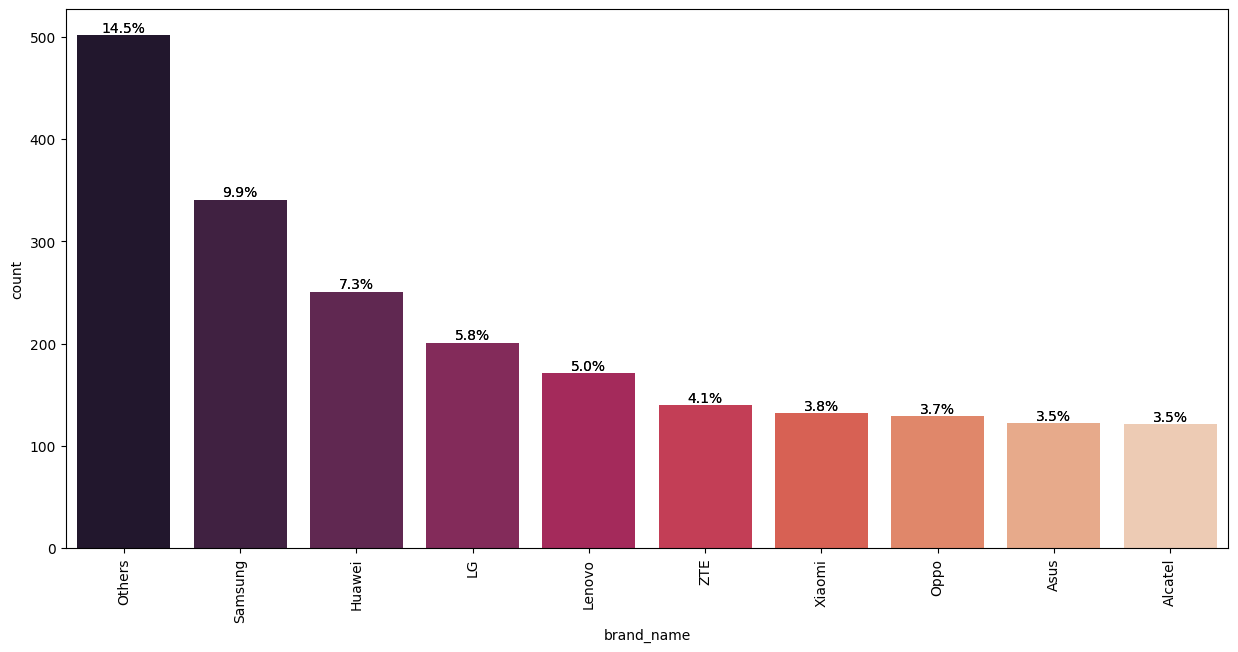

In [ ]:
get_percentage(data, 'brand_name', perc = True, n = 10)



```
OS:
```



<ipython-input-89-c3added11313>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])
<ipython-input-89-c3added11313>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])


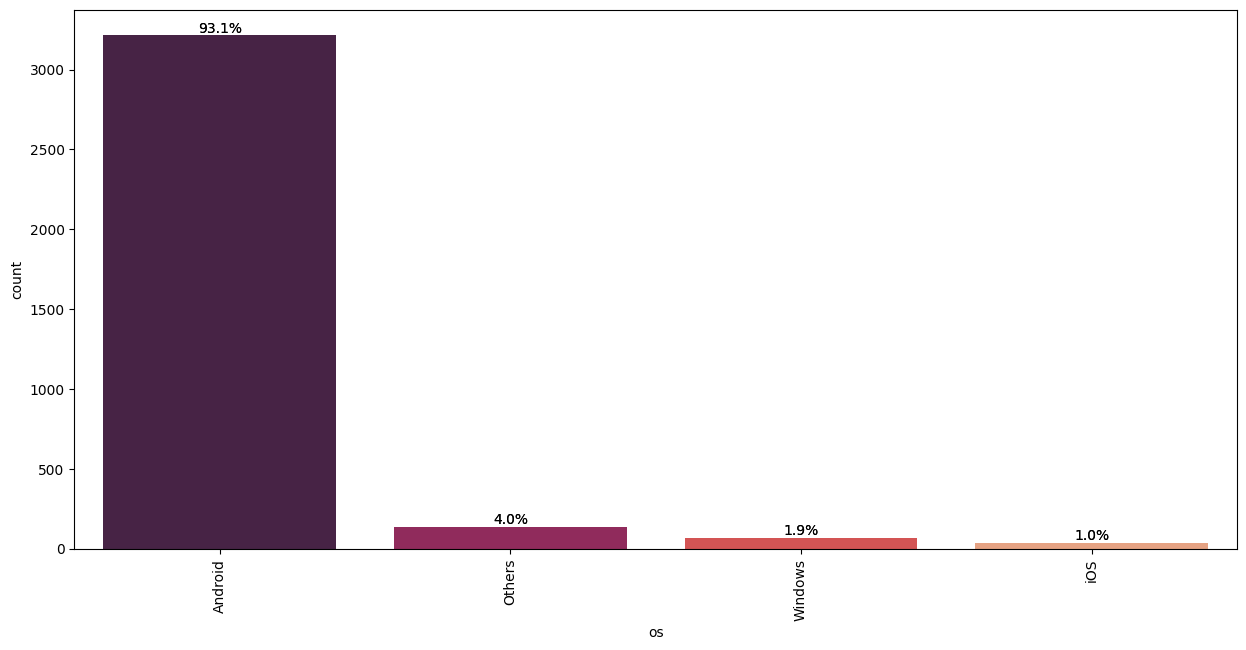

In [ ]:
get_percentage(data, 'os', perc = True, n = 10);



```
Screen Size:
```



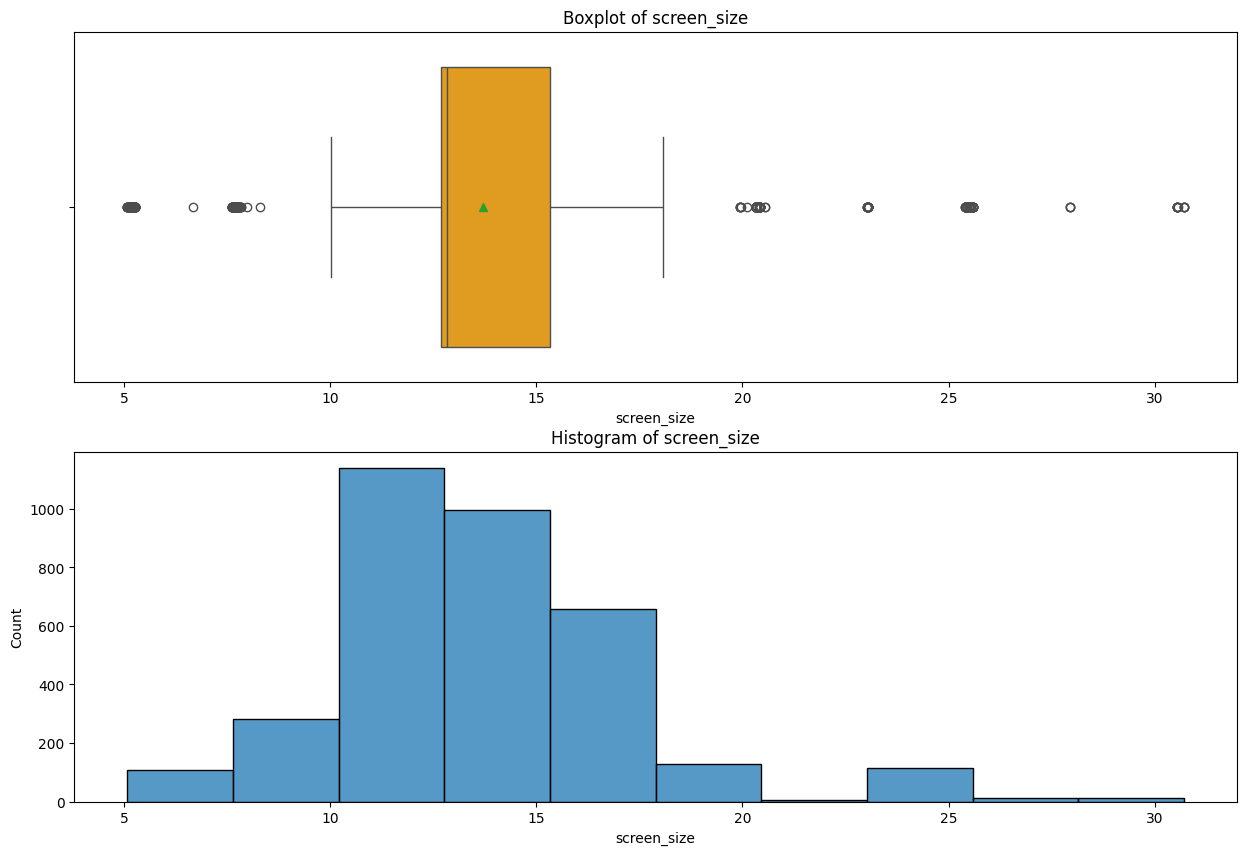

In [ ]:
boxplot_hist(data, 'screen_size')



```
4G devices:
```



<ipython-input-89-c3added11313>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])
<ipython-input-89-c3added11313>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])


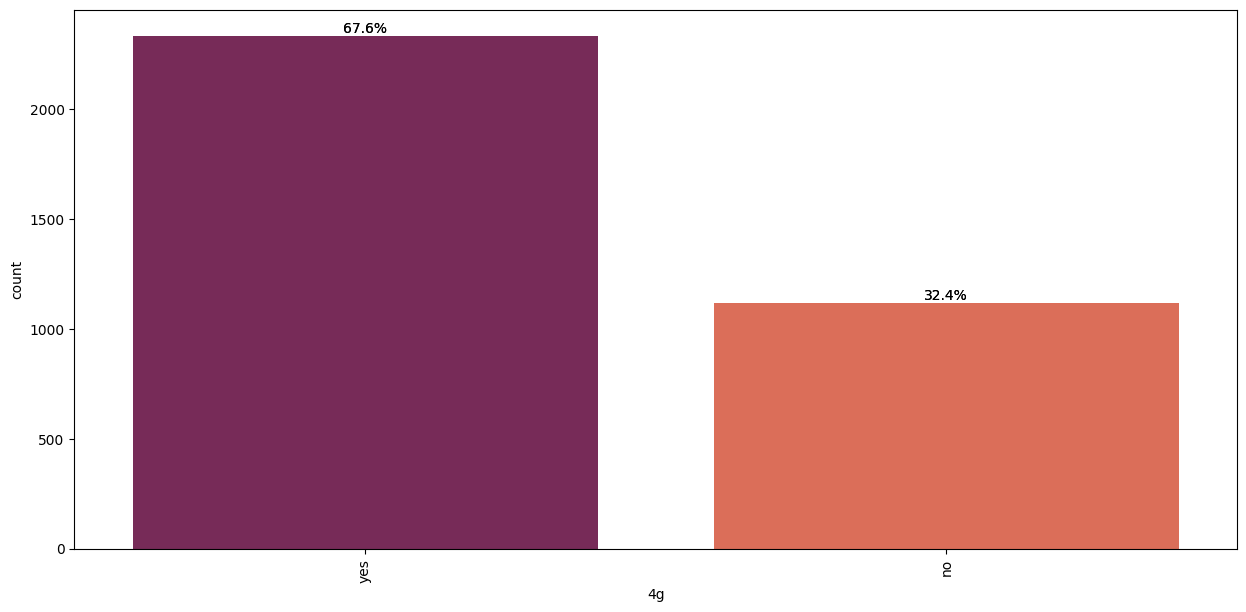

In [ ]:
get_percentage(data, '4g', perc = True,n=10);



```
5G devices:
```



<ipython-input-89-c3added11313>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])
<ipython-input-89-c3added11313>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])


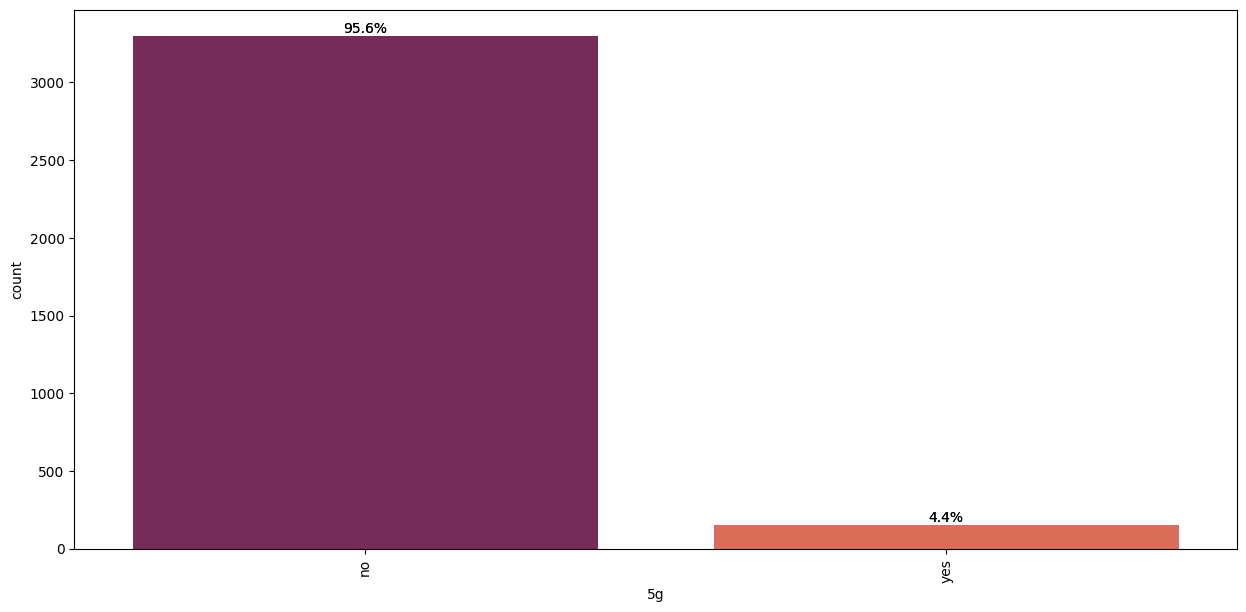

In [ ]:
get_percentage(data, '5g', perc = True, n=10)



```
main_camera_mp
```



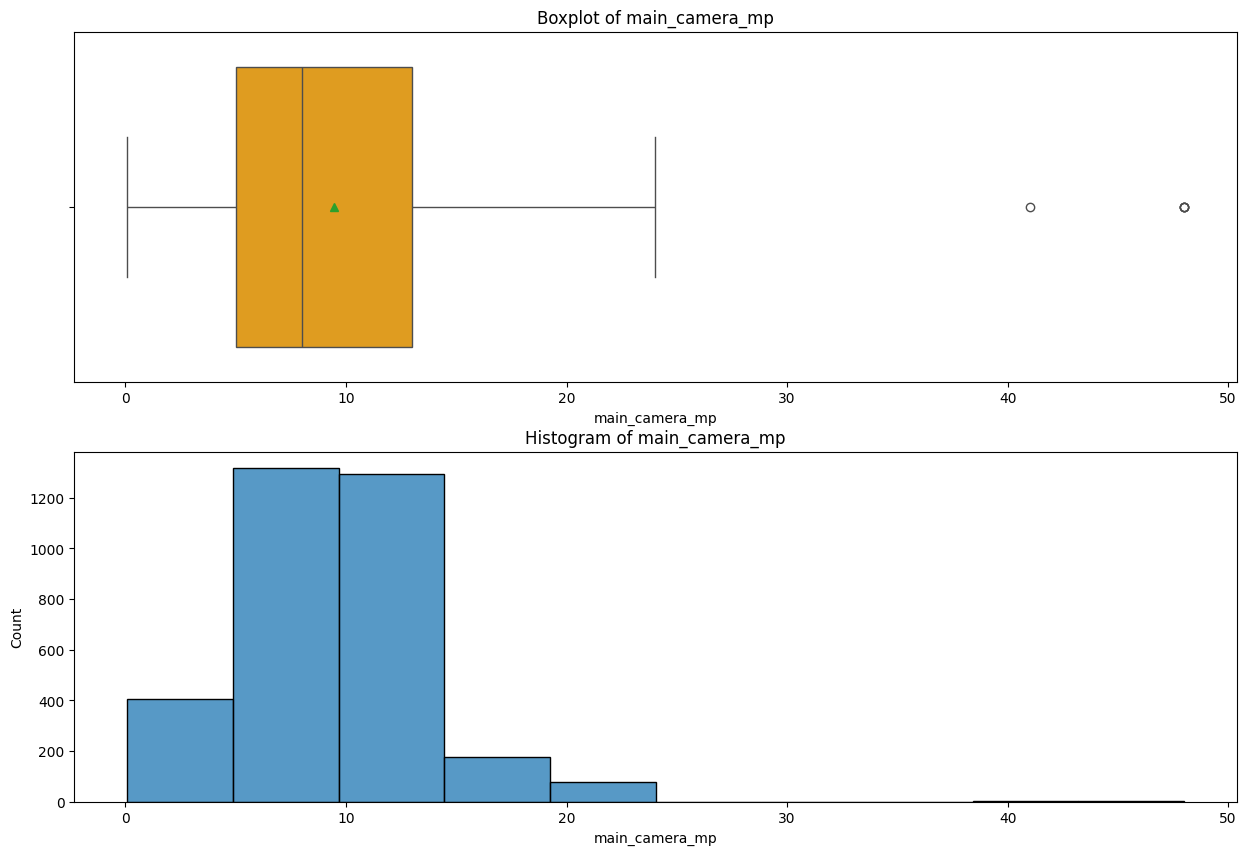

In [ ]:
boxplot_hist(data, 'main_camera_mp')



```
selfie_camera_mp
```



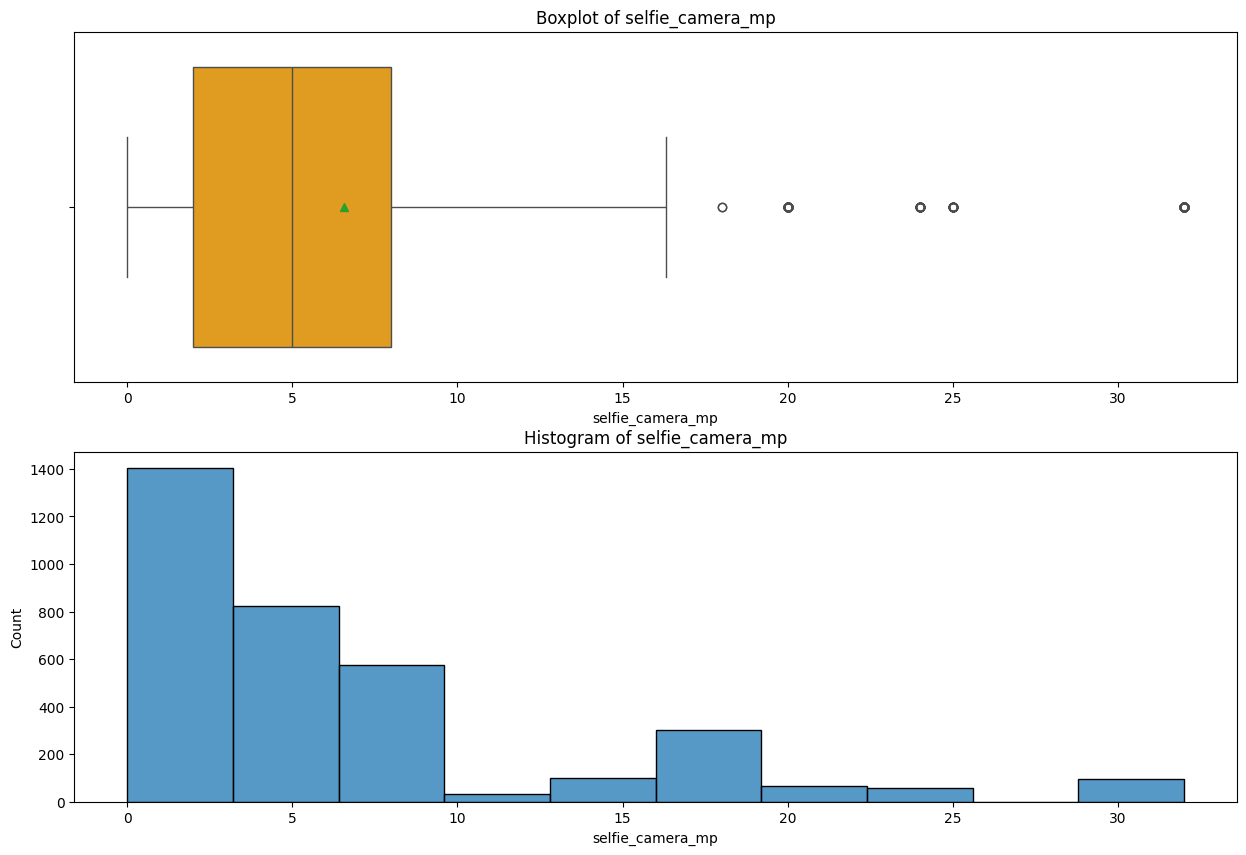

In [ ]:
boxplot_hist(data, 'selfie_camera_mp')



```
int_memory
```



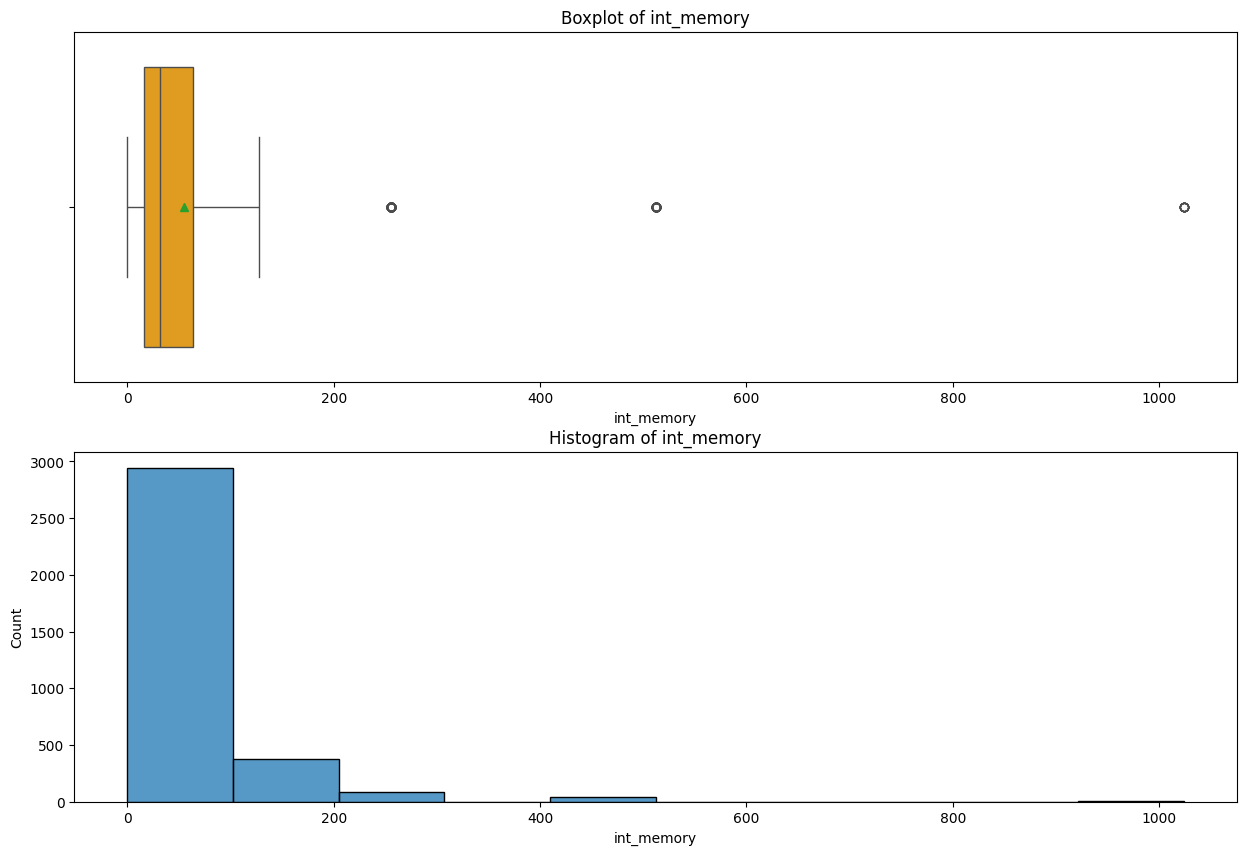

In [ ]:
boxplot_hist(data, 'int_memory')



```
ram
```



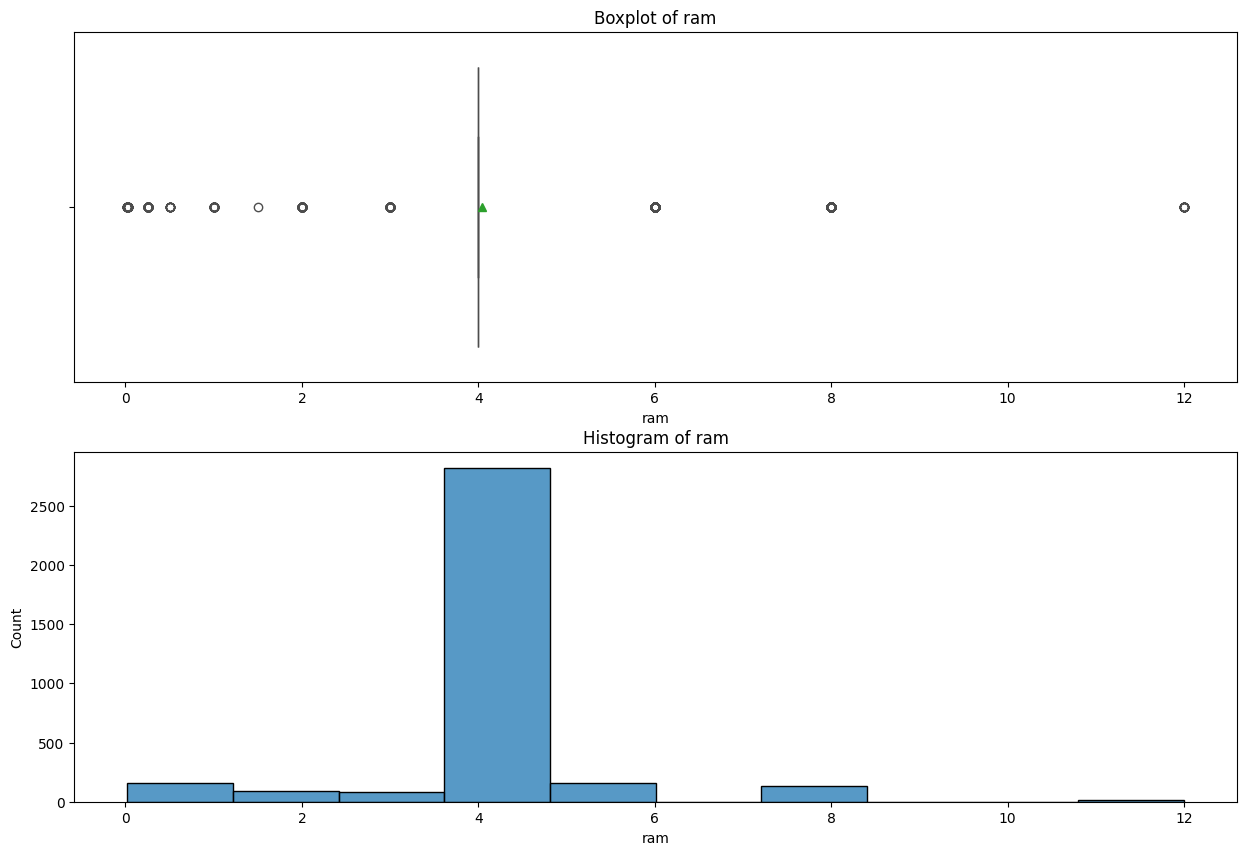

In [ ]:
boxplot_hist(data, 'ram')



```
weight
```



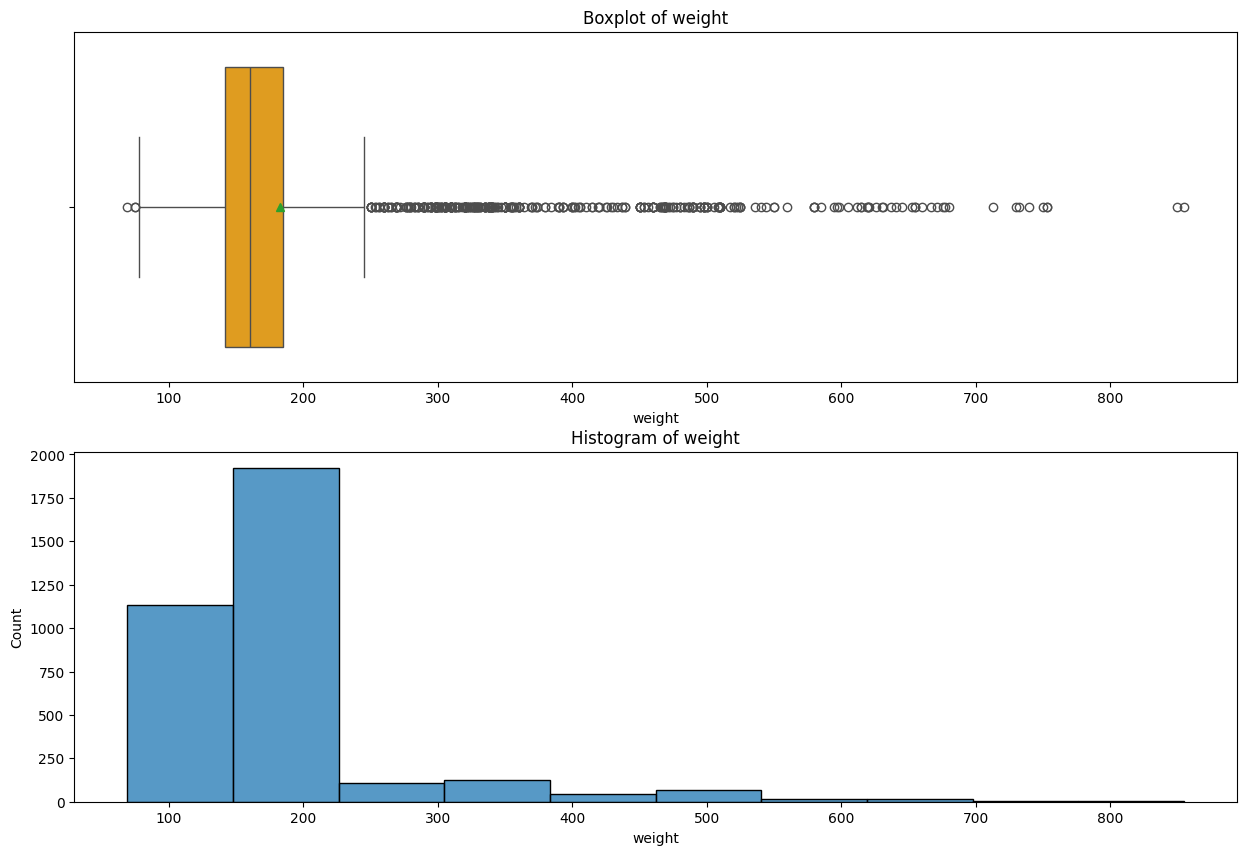

In [ ]:
boxplot_hist(data, 'weight')




```
Battery
```



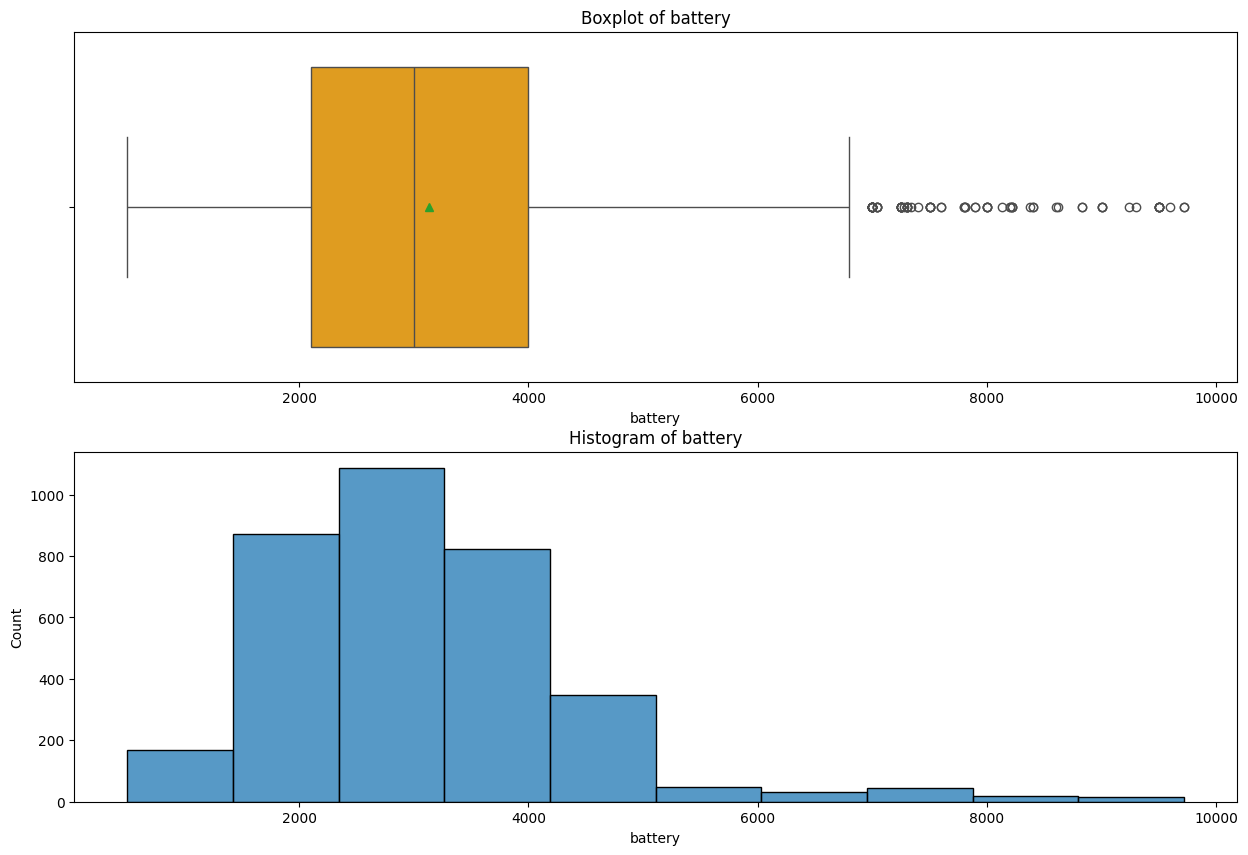

In [ ]:
boxplot_hist(data, 'battery')



```
days_used
```



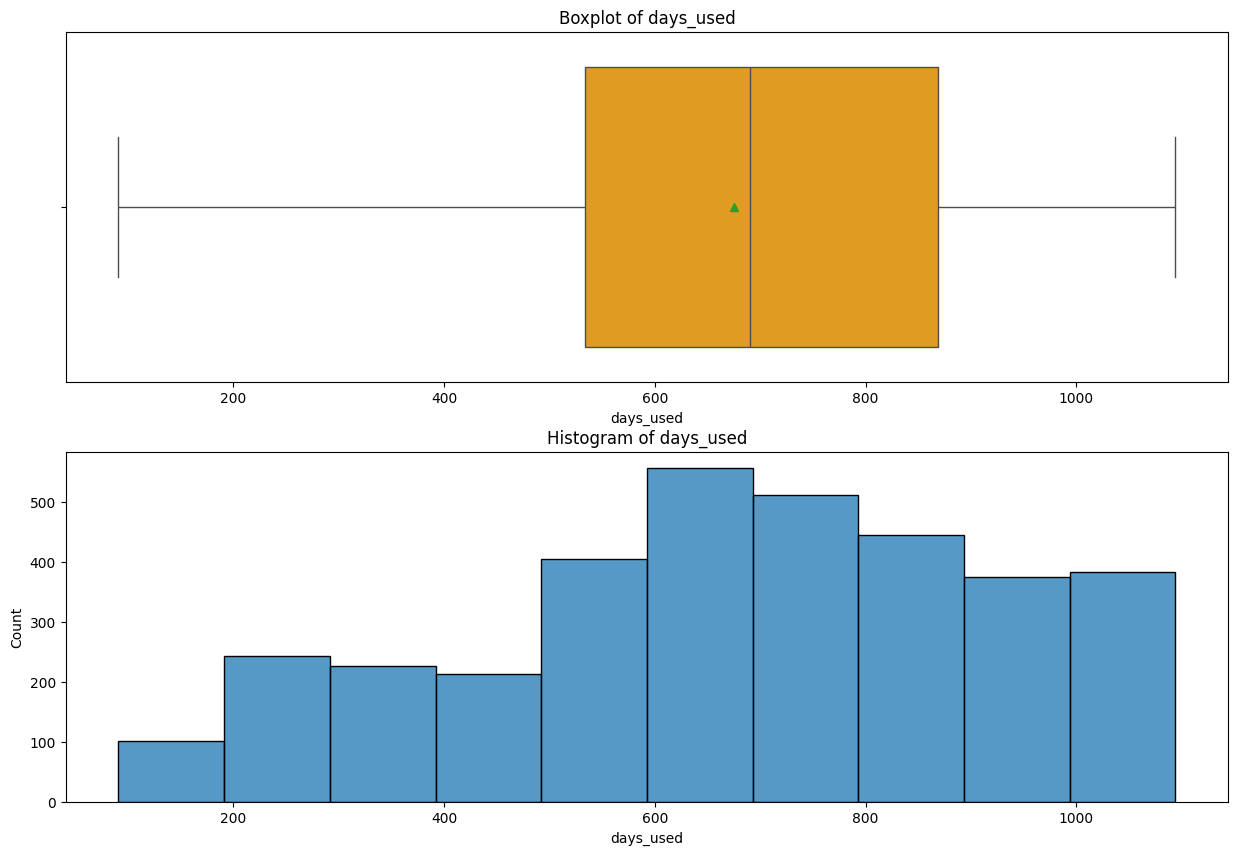

In [ ]:
boxplot_hist(data, 'days_used')



```
release_year
```



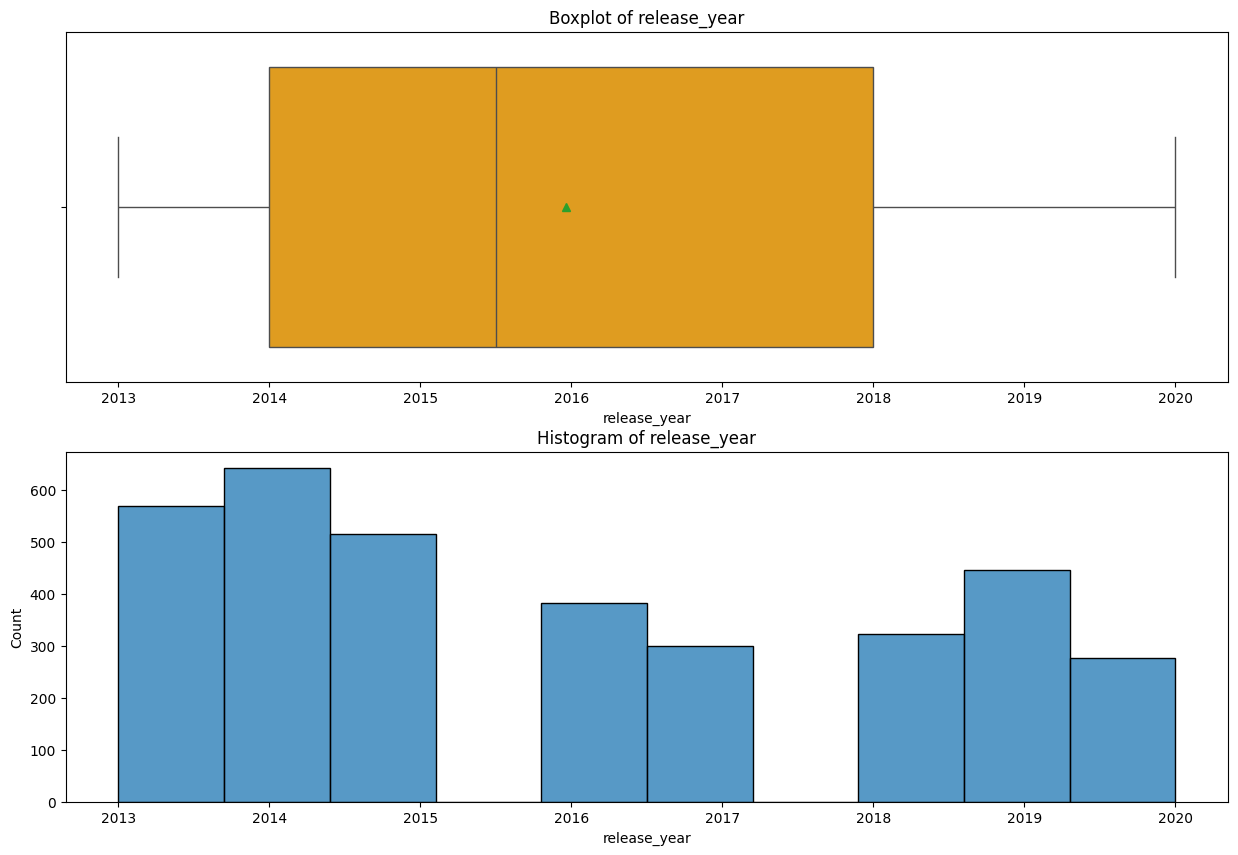

In [ ]:
boxplot_hist(data, 'release_year')



```
normalized_used_price

```



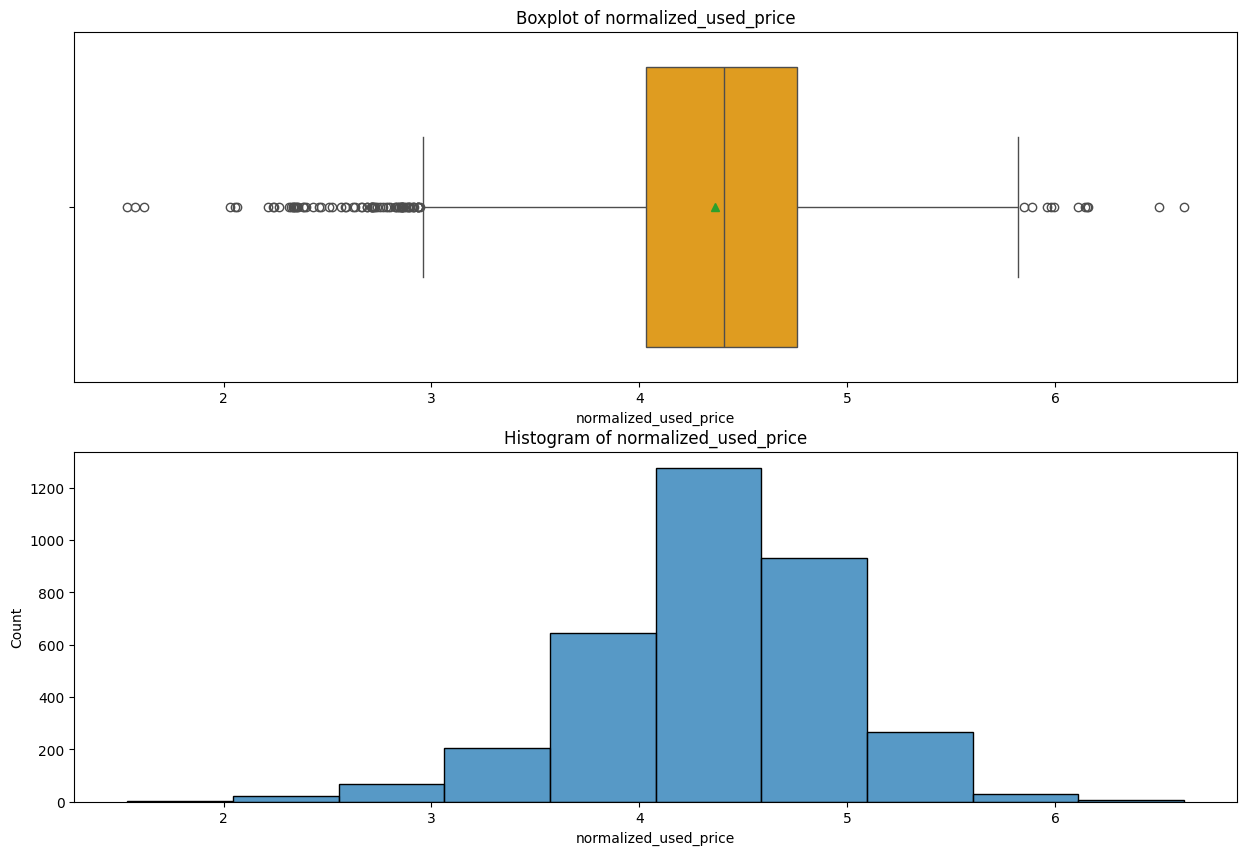

In [ ]:
boxplot_hist(data, 'normalized_used_price')



```
normalized_new_price
```



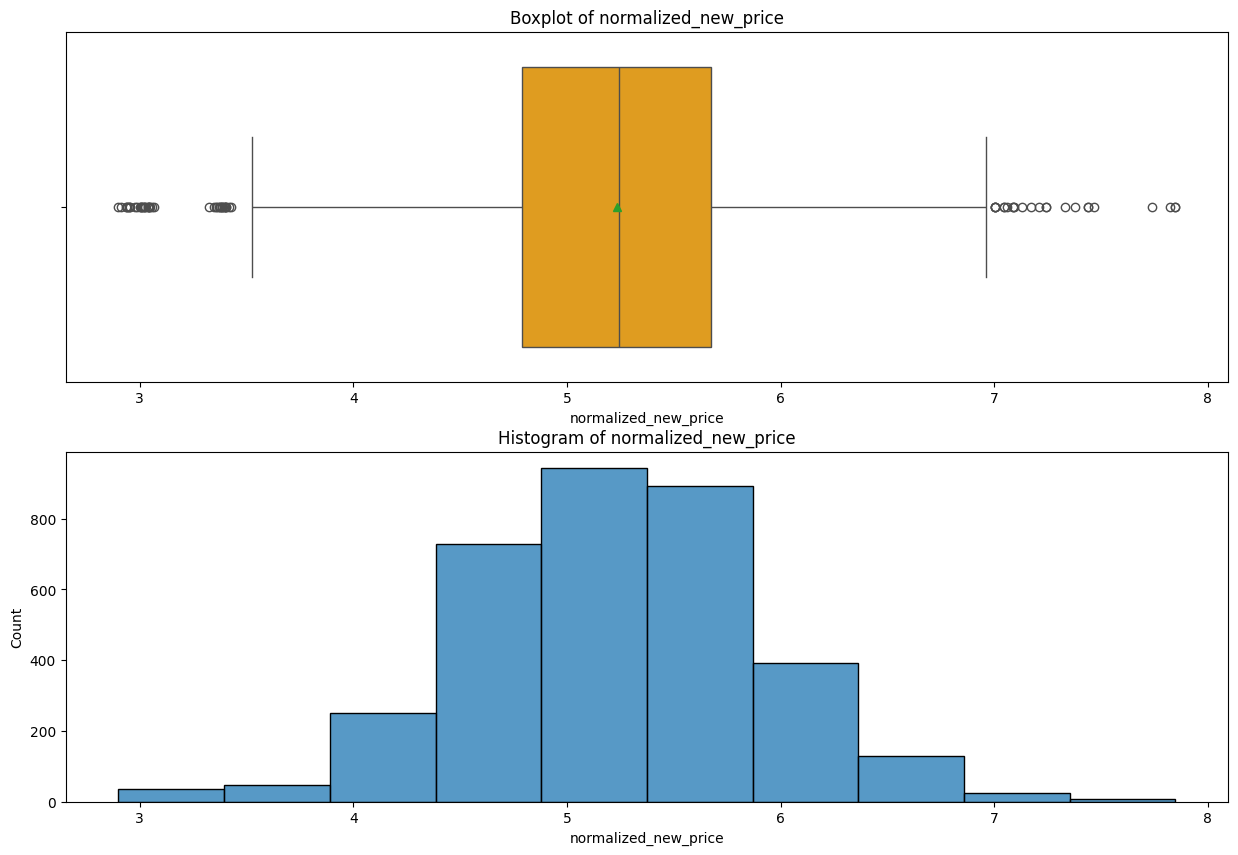

In [ ]:
boxplot_hist(data, 'normalized_new_price')

##Biraviate Analysis

`Running Analysis on all variables`

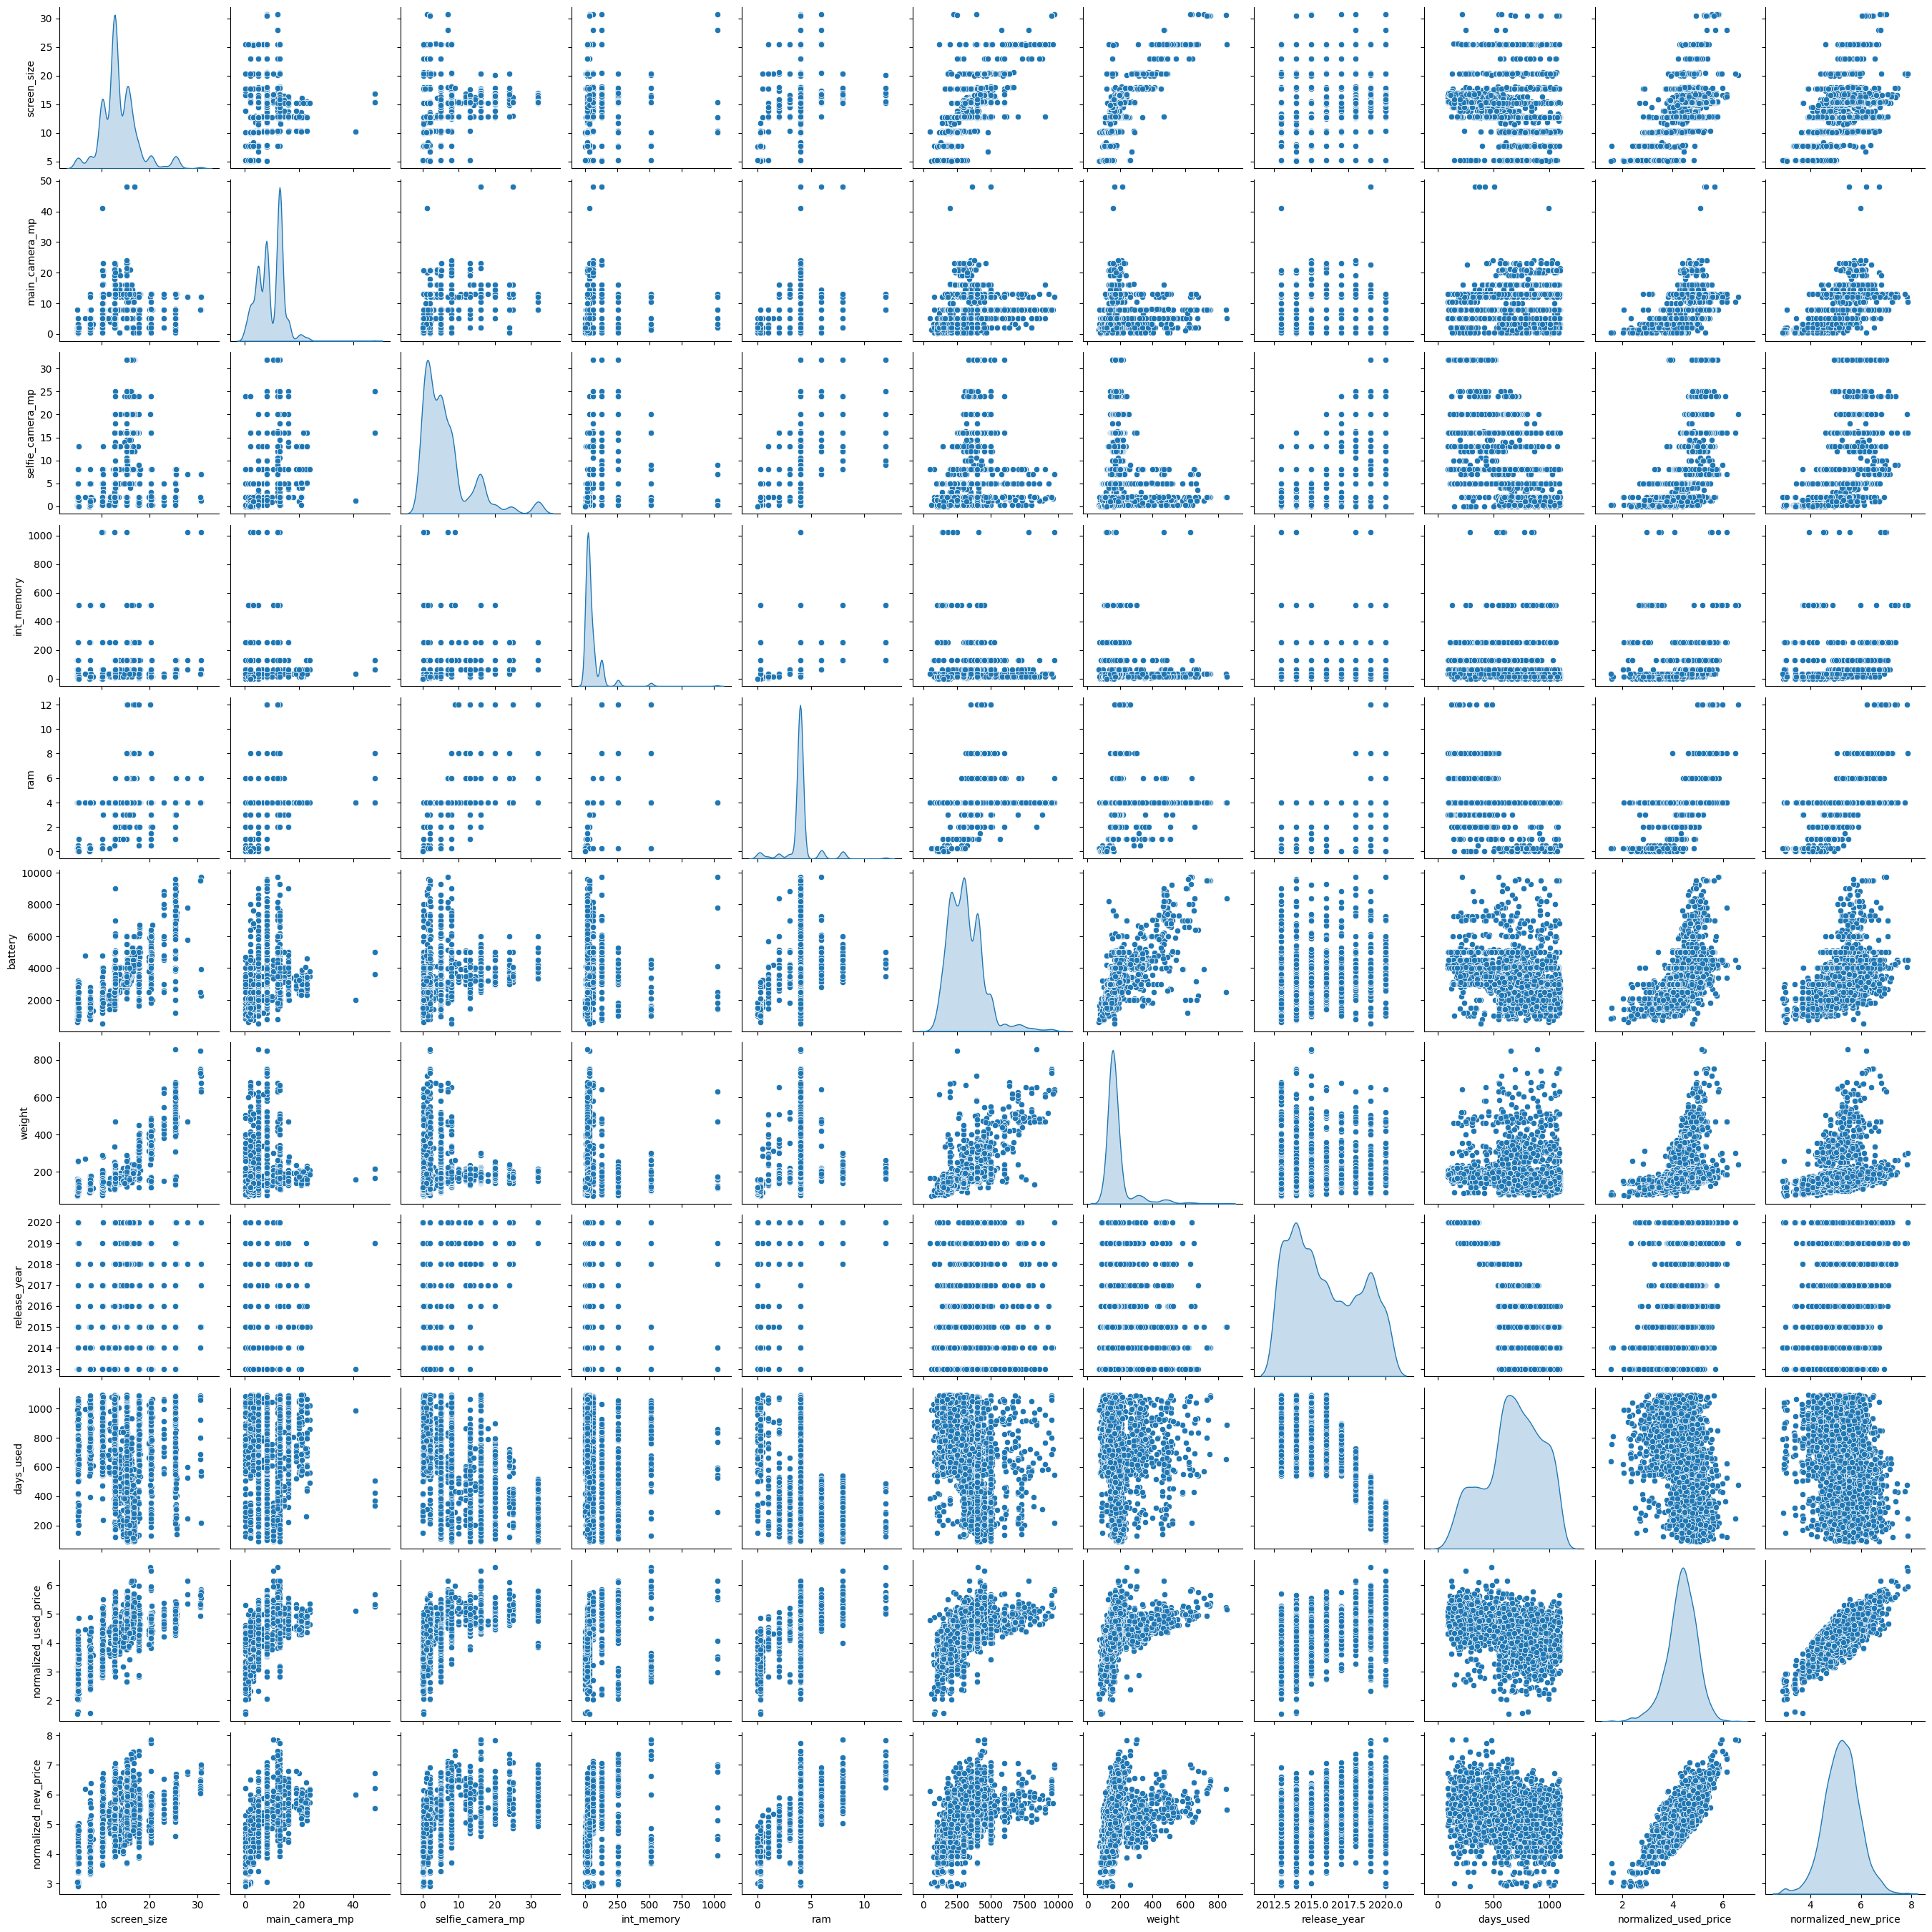

In [ ]:
#putting every single variable against each other
sns.pairplot(data, diag_kind='kde')



```
RAM vs. brand names:
```



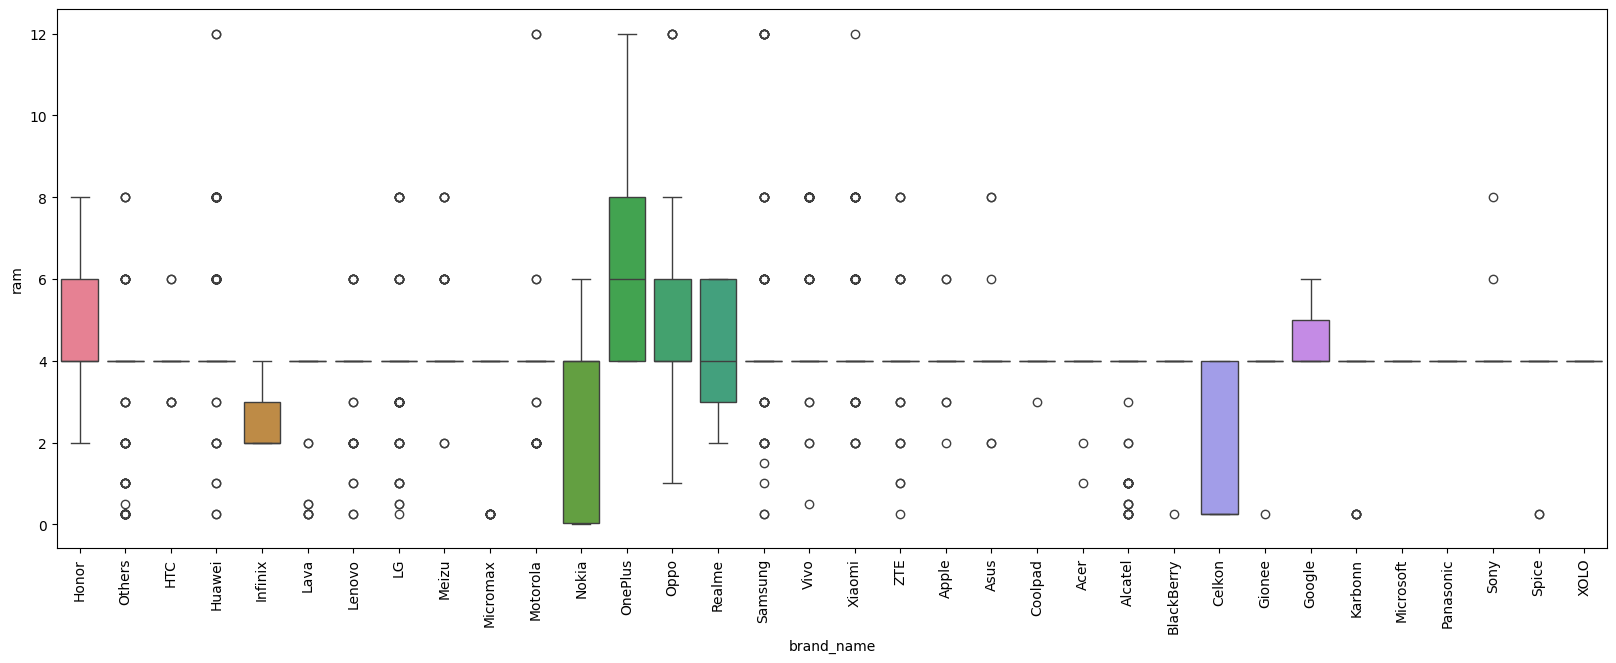

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data, x='brand_name', y='ram', hue = 'brand_name')
plt.xticks(rotation=90)
plt.show(block=True)

##Finding brands with over average RAM

In [ ]:
data['brand_name'].nunique()


34

In [ ]:
avg_ram = data.groupby('brand_name')['ram'].mean()
over_avg_ram = avg_ram[avg_ram > avg_ram.mean()]
print('There are only ', avg_ram.count(), 'brands with over average RAM')
print('Brands offered over average RAM: \n', over_avg_ram);

There are only  34 brands with over average RAM
Brands offered over average RAM: 
 brand_name
Apple        4.000000
Asus         4.049180
Google       4.533333
HTC          4.000000
Honor        4.603448
Huawei       4.655378
Meizu        4.451613
Microsoft    4.000000
OnePlus      6.363636
Oppo         4.961240
Panasonic    4.000000
Realme       4.195122
Samsung      4.199413
Sony         4.069767
Vivo         4.756410
XOLO         4.000000
Xiaomi       4.583333
ZTE          4.023214
Name: ram, dtype: float64




```
battery vs brand
```



Finding brands with battery > 4500mAH

In [ ]:
large_battery = data[data.battery > 4500].brand_name.unique()
print('Brands with large battery: \n', large_battery)

Brands with large battery: 
 ['Honor' 'Others' 'Huawei' 'Infinix' 'Lenovo' 'LG' 'Motorola' 'Realme'
 'Vivo' 'Xiaomi' 'ZTE' 'Samsung' 'Apple' 'Acer' 'Alcatel' 'Asus' 'Gionee'
 'Google' 'HTC' 'Micromax' 'Nokia' 'Panasonic' 'Sony' 'Spice' 'Oppo']


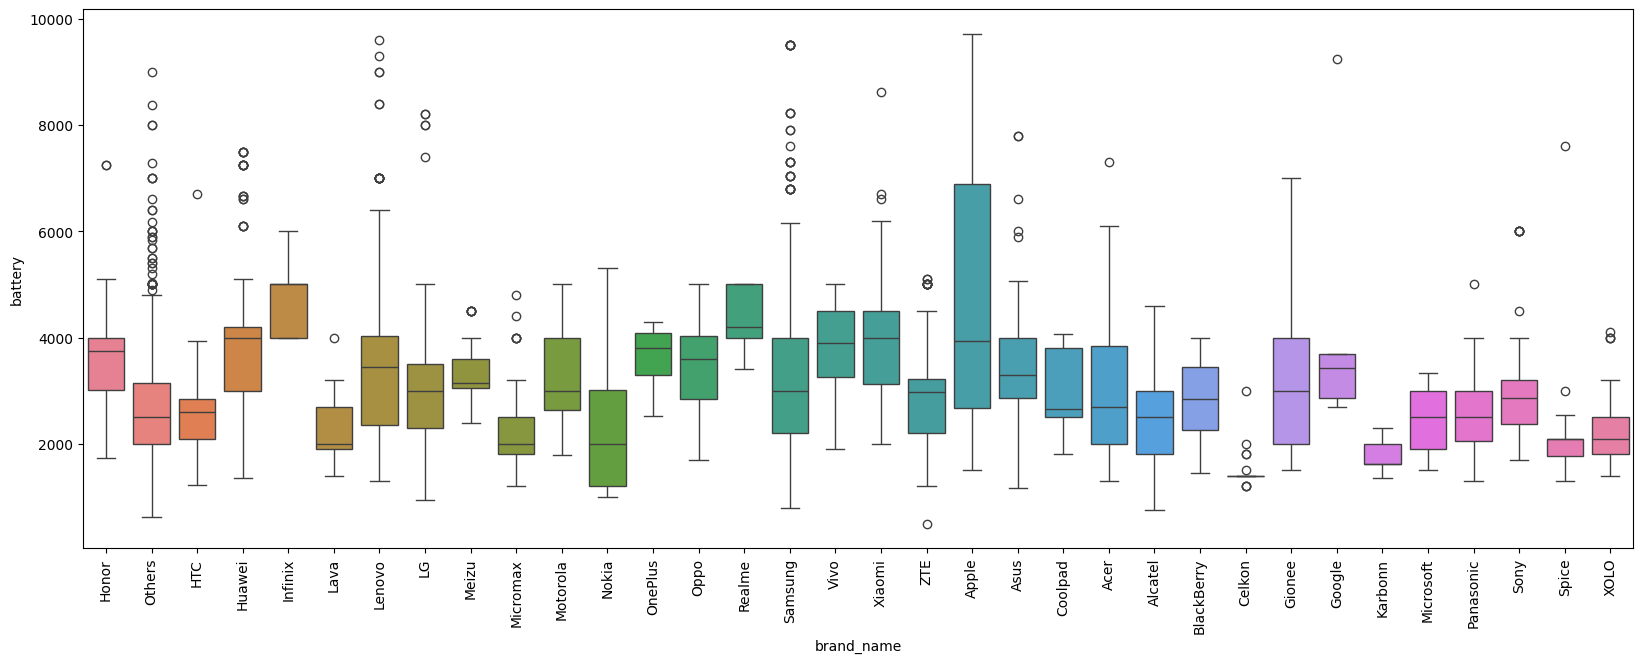

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data, x='brand_name', y='battery', hue = 'brand_name')
plt.xticks(rotation=90)
plt.show(block=True)

###Used devices prices throughout the years:

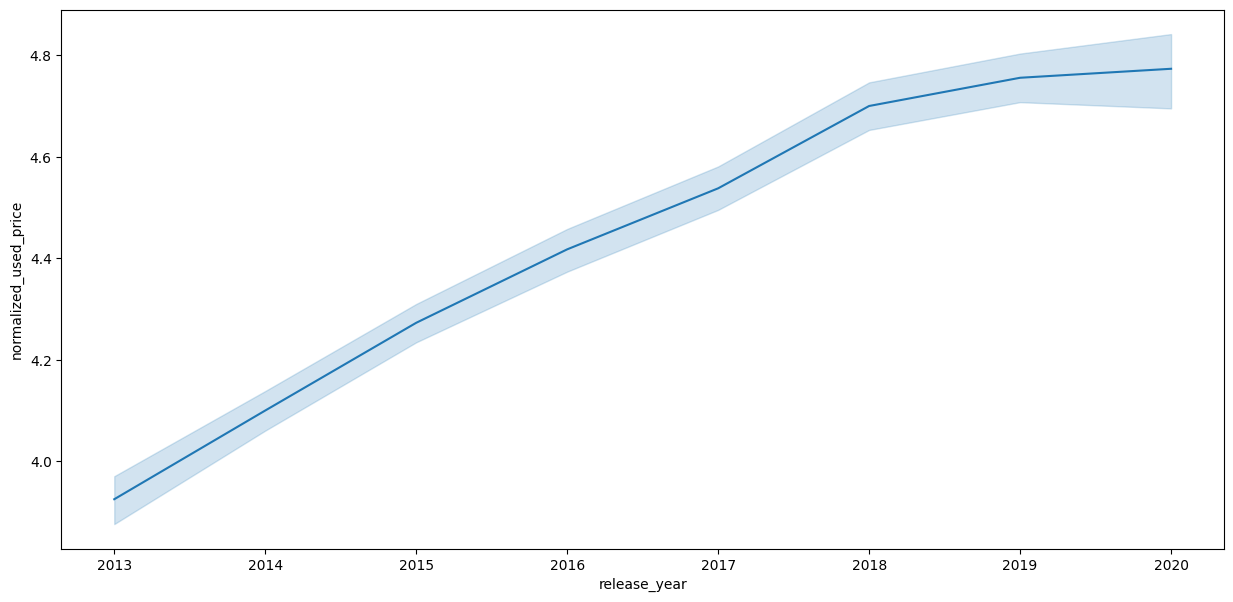

In [ ]:
#plotting linegraph tracking used devices' price based on their released year
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='release_year', y='normalized_used_price')
plt.show(block=True)

###Distribution of normalized used device prices:-

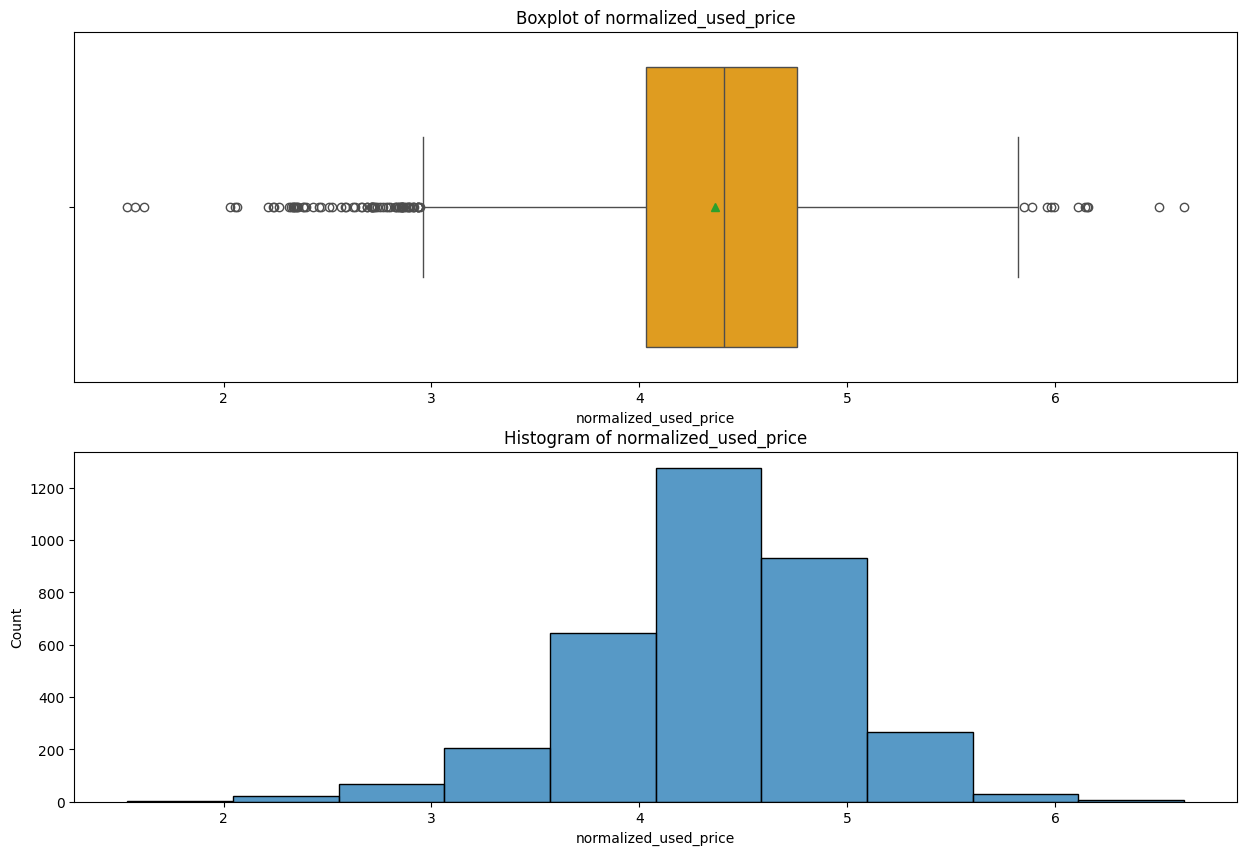

In [ ]:
boxplot_hist(data, 'normalized_used_price')

###Percentage of devices dominated by Android devices


<ipython-input-89-c3added11313>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])
<ipython-input-89-c3added11313>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])


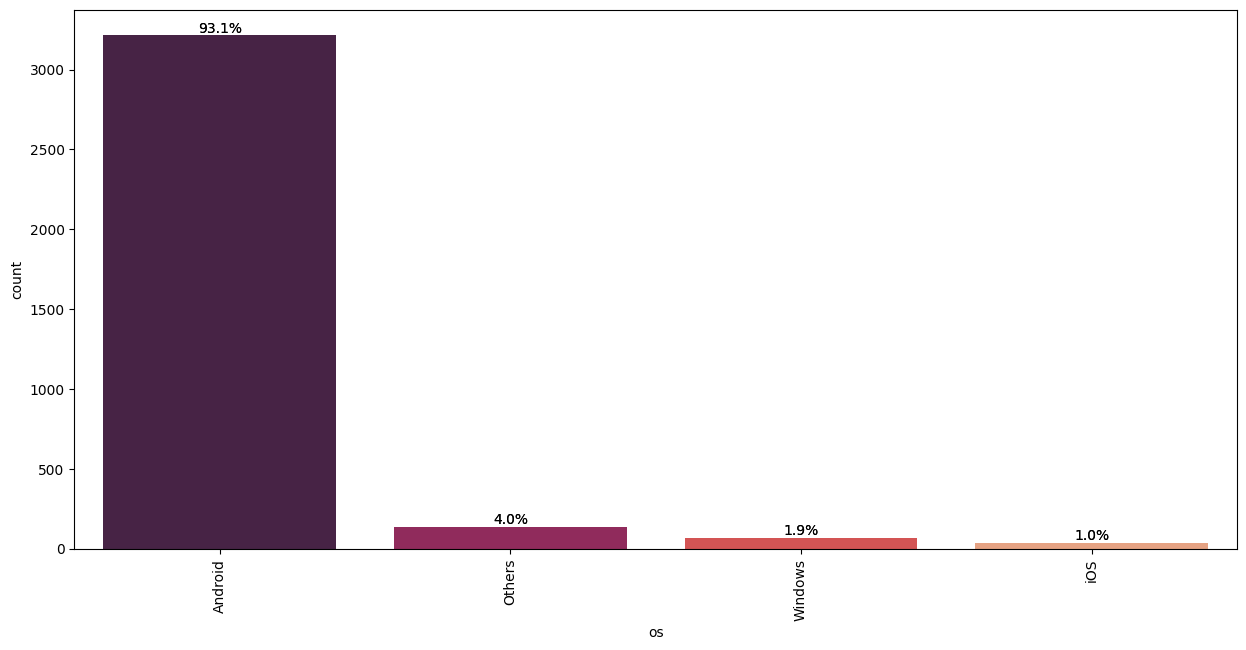

In [ ]:
get_percentage(data, 'os', perc = True, n = 10)

###RAM varying by brands. Showing only 5 brands that offer most of their product > 4GB of RAM

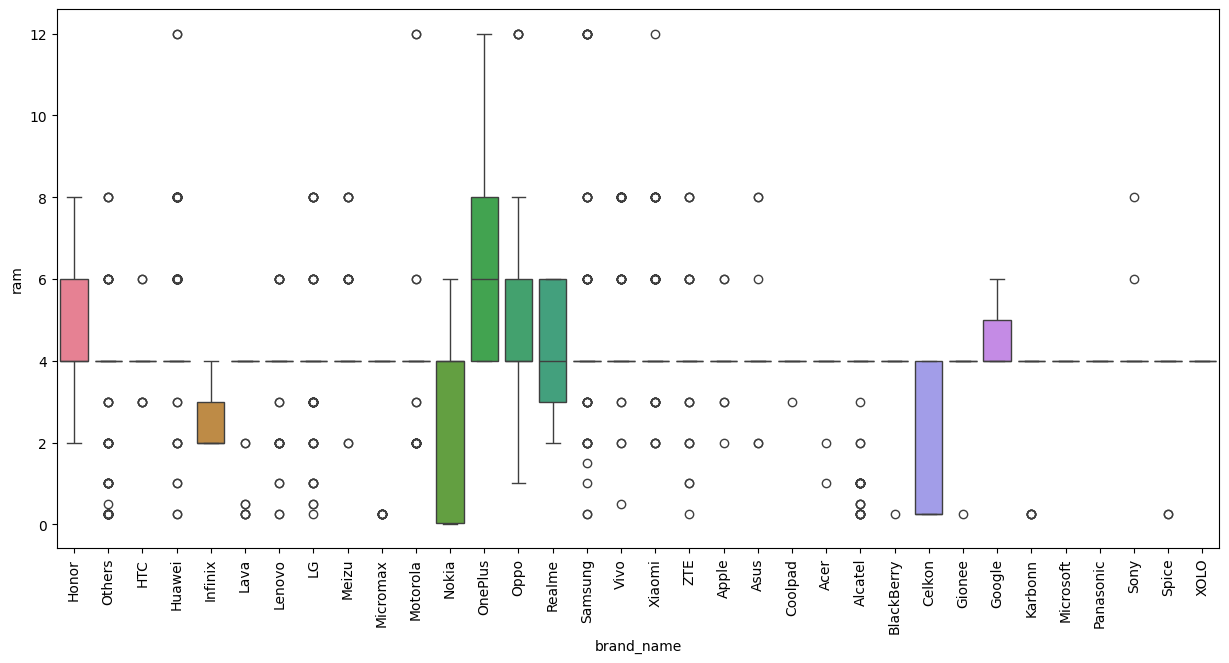

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data, x='brand_name', y='ram', hue = 'brand_name')
plt.xticks(rotation=90)
plt.show(block=True)

 Large battery often increases a device's weight, making it feel uncomfortable in the hands.  AS we know, bigger screen = heavier device. See below for full visualization of their correlation.


<Axes: xlabel='battery', ylabel='weight'>

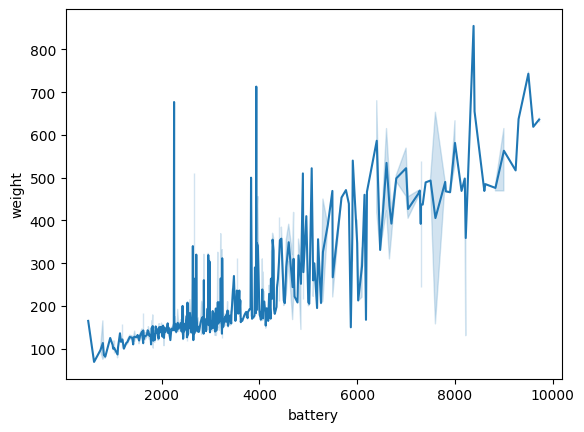

In [ ]:
sns.lineplot(data=data, x='battery', y='weight')


###Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. There are about 1099 devices model on the market that offers user with that option. Below will be their visual analysis.

In [ ]:
big_screen = data[data.screen_size > 6 * 2.54].count()[0]
print('Number of devices offereing screen over 6in. = ', big_screen, "devices")

Number of devices offereing screen over 6in. =  1099 devices


<ipython-input-89-c3added11313>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])
<ipython-input-89-c3added11313>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = data, x= feature, palette = 'rocket', order = data[feature].value_counts().index[:n])


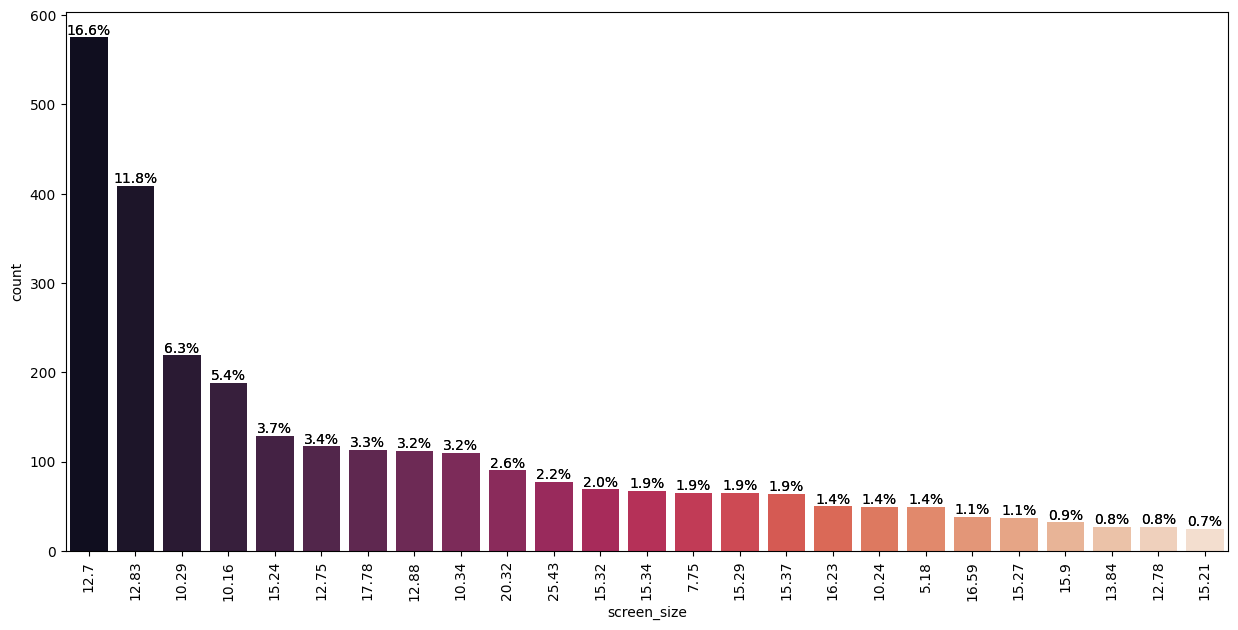

In [ ]:
get_percentage(data, 'screen_size', perc = True, n= 25)


A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. There are about 655 devices model offering camera with over 8mp for higher resolution. Here are their distribution.

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
selfie_8mp_count = data[data.selfie_camera_mp > 8].count()[0]
print('Number of devices offereing selfie camera over 8MP = ', selfie_8mp_count, "devices")

Number of devices offereing selfie camera over 8MP =  655 devices


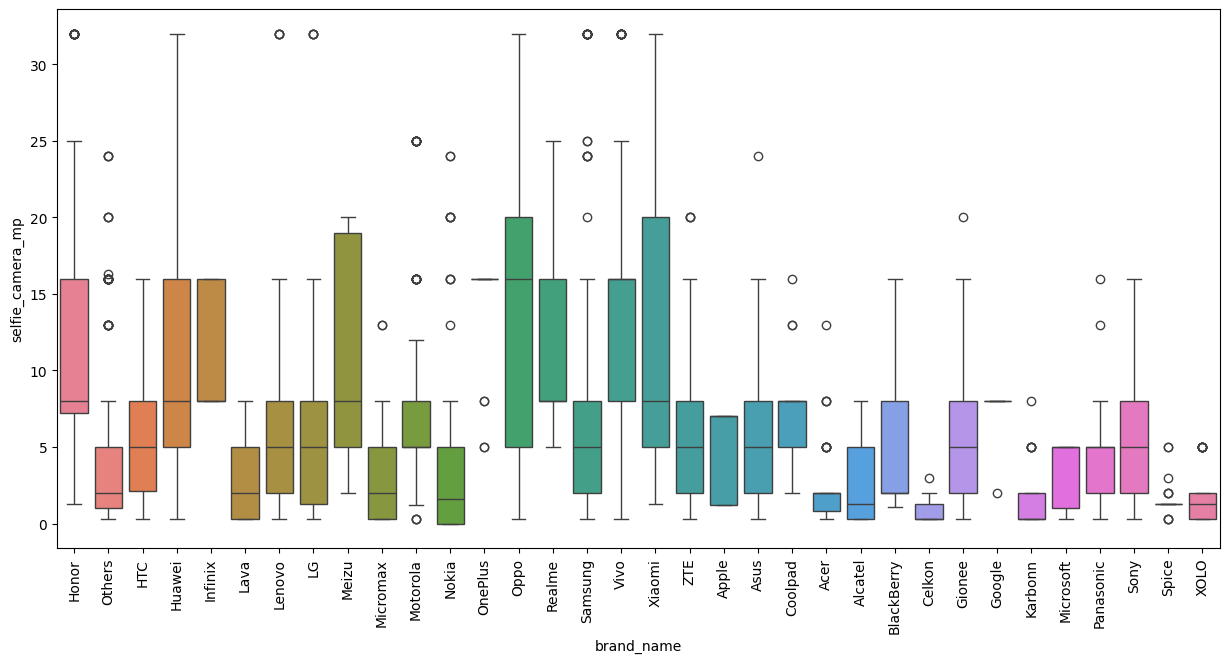

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data, x='brand_name', y='selfie_camera_mp', hue = 'brand_name')
plt.xticks(rotation=90)
plt.show(block=True)

Highest Correlation to normalized price of used device are:
- Screen size
- Camera Resolution
- Battery

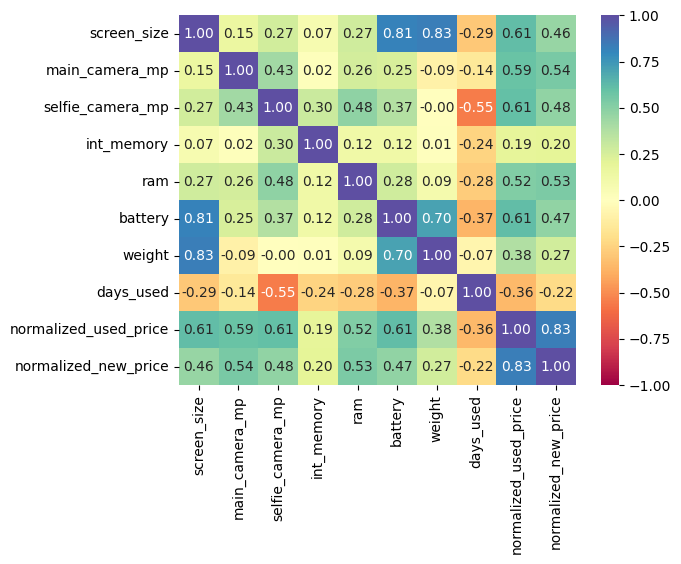

<Figure size 1500x700 with 0 Axes>

In [ ]:
#Plotting heatmap
shop_devices = data.select_dtypes(include=np.number).columns.tolist()

#drop release year
shop_devices.remove('release_year')
sns.heatmap(data[shop_devices].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.figure(figsize=(15, 7))
plt.show()

##**Overall Analysis**:

1. What does the distribution of normalized used device prices look like?
- Normal Distribution. Peaking in between 4-5 euros
2. What percentage of the used device market is dominated by Android devices?
- Over 90% of the market
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
- Only 5 brands offering most models with over 4GB or RAM.
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
- Devices with bigger battery has a positive correlation to their weight. As the battery size increase, so does the weight of the device
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
- About 1099 devices
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
- There are about 655 devices model offering camera with over 8mp for higher resolution.
7. Which attributes are highly correlated with the normalized price of a used device?
- Highest Correlation to normalized price of used device are: Screen size, Camera Resolution, Battery.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Missing Value Treatment
- Imputing values grouped by "Release year" & "Brand Name"

In [ ]:
#1st copy the data to avoid unwanted changes
df = data.copy()

In [ ]:
#checking for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#starting imputation
data_impute = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'ram', 'weight']
for col in data_impute:
  df[col].fillna(df.groupby(['release_year', 'brand_name'])[col].transform('median'), inplace=True)

In [ ]:
#check again for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

###Imputating grouped by `brand_name`

In [ ]:
data_impute = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'ram']
for col in data_impute:
  df[col].fillna(df.groupby('brand_name')[col].transform('median'), inplace=True)

df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    7
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

###Fill the remaining missing values in `main_camera_mp` by utilizing column median

In [ ]:
df['main_camera_mp'].fillna(df['main_camera_mp'].median(), inplace=True)
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

###Filling `weight` column with its median

In [ ]:
#fillna for weight column with median
df['weight'].fillna(df['weight'].median(), inplace=True)
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

###Replacing `release_year` with `year_from_release`

In [ ]:
df['year_from_release'] = 2023 - df['release_year']
df.drop('release_year', axis=1, inplace=True)


In [ ]:
df['year_from_release'].describe()

count    3454.000000
mean        7.034742
std         2.298455
min         3.000000
25%         5.000000
50%         7.500000
75%         9.000000
max        10.000000
Name: year_from_release, dtype: float64

###Checking for outliers

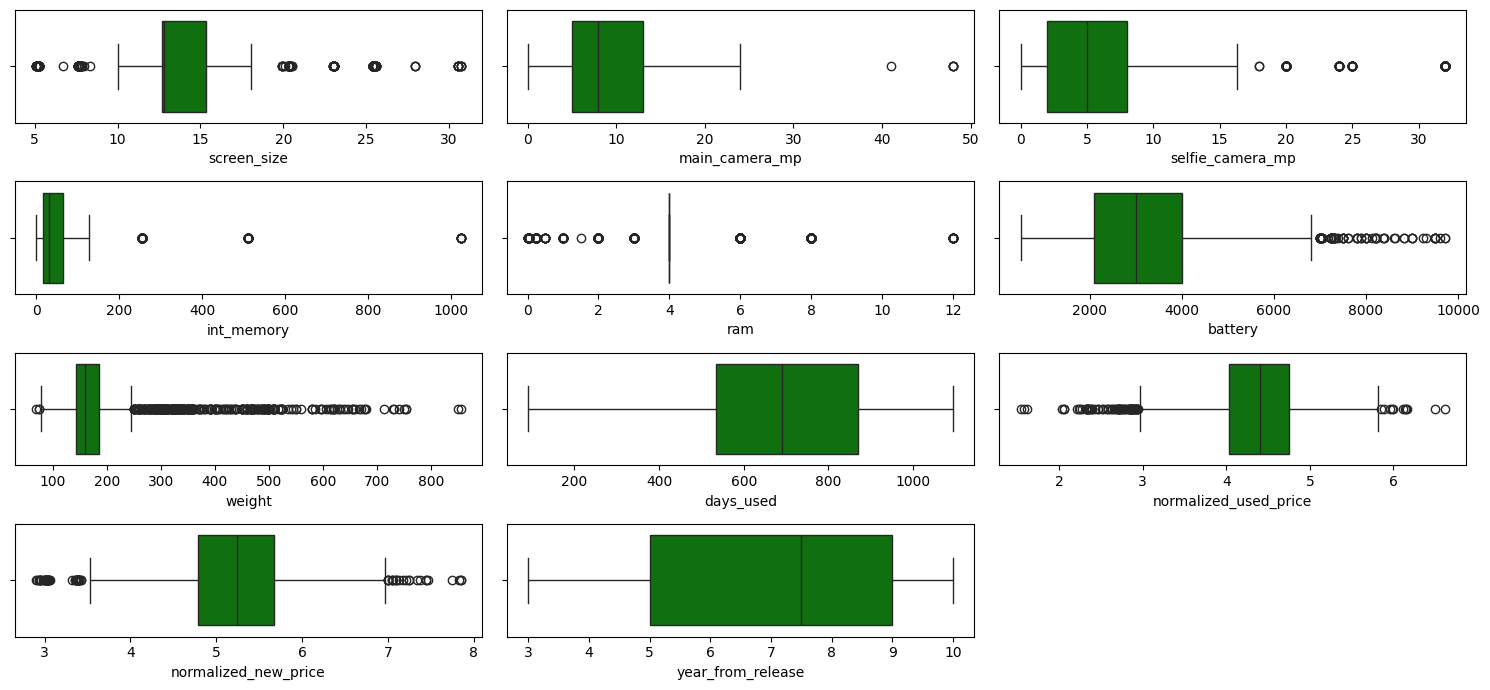

In [ ]:
df_boxplot = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))

for i in range(0, len(df_boxplot)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, x=df_boxplot[i], color = 'green')
    plt.tight_layout()

plt.show()

###Prepping the Data:

In [ ]:
#defining dependent vs independent
X = df.drop(['normalized_used_price'], axis=1)
y = df['normalized_used_price']

print(X.shape)
print(y.shape)

(3454, 14)
(3454,)


In [ ]:
#creating dummies variables
X = pd.get_dummies(X, columns= X.select_dtypes(include=['object','category']).columns.tolist(), drop_first=True)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,year_from_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,3,...,False,False,False,False,False,False,False,False,True,False
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,3,...,False,False,False,False,False,False,False,False,True,True
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,3,...,False,False,False,False,False,False,False,False,True,True
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,3,...,False,False,False,False,False,False,False,False,True,True
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,3,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#adding constant term
X= sm.add_constant(X)

In [ ]:
#splitting in 70:30 ratio for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2417, 49)
(1037, 49)
(2417,)
(1037,)


## Model Building - Linear Regression

In [ ]:
# Converting boolean variables to float to ensure compatibility with the model
for col in X_train.columns:
    if X_train[col].dtype == bool:
        X_train[col] = X_train[col].astype(float)

In [ ]:
#check for missing Value in X_Train
missing_values = X_train.isnull().sum()
print(missing_values)

const                    0
screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_new_price     0
year_from_release        0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_Realme        0
b

In [ ]:
#running prototype
model_prototype = sm.OLS(y_train, X_train).fit()
print(model_prototype.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           01:30:57   Log-Likelihood:                 124.06
No. Observations:                   2417   AIC:                            -150.1
Df Residuals:                       2368   BIC:                             133.6
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

Testing using different metrics:
- RMSE, MAE, $R^2$
- Calculate MAPE and $R^2$

In [ ]:
#compute using adj R-squared
def adj_r2 (indicators, target, predictions):
  r2 = r2_score(target, predictions)
  n = indicators.shape[0]
  k = indicators.shape[1]
  adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
  return adj_r2


In [ ]:
#compute MAPE
def mape (target, predictions):
  mape = np.mean(np.abs((target - predictions) / target)) * 100
  return mape

In [ ]:
#checking performance of regression model
def regression_performance(model, indicators, target):

  #using independent variables
  predictions = model.predict(indicators)

  #R-squared
  r2 = r2_score(target, predictions)

  #adjusted R-squared
  adjusted_r2 = adj_r2(indicators, target, predictions)

  #RMSE
  rmse = np.sqrt(mean_squared_error(target, predictions))

  #MAE
  mae = mean_absolute_error(target, predictions)

  #MAPE
  mape_2 = mape(target, predictions)

  performance_testing = pd.DataFrame({'R-squared': r2, 'Adjusted R-squared': adj_r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}, index=[0])
  return performance_testing




In [ ]:
#Model performance utilizing train dataset
print("Model Performance on Train Dataset: ")
print(regression_performance(model_prototype, X_train, y_train))

Model Performance on Train Dataset: 
   R-squared                   Adjusted R-squared      RMSE       MAE  \
0   0.844913  <function adj_r2 at 0x78d37712c0d0>  0.229864  0.180272   

                                MAPE  
0  <function mape at 0x78d37764bf40>  


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Checking for the following assumption:
- No Multicollinearity
- Linearity of variables
- Independence of errors
- Normality of errors
- Ensure no Heteroscedasticity

###Start with Multicollinearity test using VIF:
- VIF = 1 | No multicollinearity
- VIF > 5 or near 5 | Moderate multicollinearity
- VIF > 10 or near 10 | High multiconllinearity

In [ ]:
#VIF Function
def vif_calc(predictors):
    vif = pd.DataFrame()
    vif["variables"] = predictors.columns
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
    return(vif)


In [ ]:
#checking on VIF
check_vif = vif_calc(X_train)
check_vif

,variables,VIF
0,const,240.439205
1,screen_size,7.683905
2,main_camera_mp,2.285215
3,selfie_camera_mp,2.812607
4,int_memory,1.364145
5,ram,2.282329
6,battery,4.081726
7,weight,6.394959
8,days_used,2.660915
9,normalized_new_price,3.119211


**Verdict:** There are multiple high VIF shown in testing data. Hence removing Multicollinearity is needed.

###Removing Multicollinearity:

In [ ]:
def remove_multicollinearity(indicators, target, high_vif_columns):

  #empty list
  adj_r2 = []
  rmse = []

  # build ols models by dropping one of the high VIF columns at a time
  # store the adjusted R-squared and RMSE in the lists defined previously
  for col in high_vif_columns:

    #define new train set
    train = indicators.loc[:, indicators.columns.str.startswith(col)]

    #fit model
    model_new = sm.OLS(target, train).fit()

    #compute adjusted R-squared and RMSE
    adj_r2.append(model_new.rsquared_adj)
    rmse.append(np.sqrt(model_new.mse_resid))

  #create dataframe
  df_new = pd.DataFrame({'column': high_vif_columns, 'adj_r2': adj_r2, 'Post drop RMSE': rmse}).sort_values(by='adj_r2', ascending=False)
  df_new.reset_index(drop=True, inplace=True)

  return df_new



In [ ]:
#specify columns with high VIF
high_vif_columns = check_vif[check_vif['VIF'] > 5]['variables'].tolist()
print(high_vif_columns)

['const', 'screen_size', 'weight', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_iOS']


In [ ]:
#showing all data in high VIF columns
res = remove_multicollinearity(X_train, y_train, high_vif_columns)
res

,column,adj_r2,Post drop RMSE
0,screen_size,9.538216e-01,0.946973
1,weight,8.352594e-01,1.788621
2,brand_name_Others,1.278493e-01,4.115417
3,brand_name_Samsung,1.024679e-01,4.174871
4,brand_name_Huawei,8.159151e-02,4.223145
5,brand_name_Apple,1.745385e-02,4.368120
6,os_iOS,1.548277e-02,4.372499
7,const,-2.220446e-16,0.583812


In [ ]:
colunm_to_drop = 'screen_size', 'weight', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_iOS'
X_train_new = X_train.loc[:, ~X_train.columns.str.startswith(colunm_to_drop)]
X_test_new = X_test.loc[:, ~X_test.columns.str.startswith(colunm_to_drop)]


In [ ]:
check_vif_new = vif_calc(X_train_new)
#print('VIF after dropping, ',column_to_drop)
check_vif_new

,variables,VIF
0,const,136.238623
1,main_camera_mp,2.097550
2,selfie_camera_mp,2.707872
3,int_memory,1.353382
4,ram,2.255007
5,battery,1.722392
6,days_used,2.645120
7,normalized_new_price,2.766930
8,year_from_release,4.670392
9,brand_name_Alcatel,1.105133


###Dropping High P-Values variables

In [ ]:
#initial list
predictors = X_train_new.copy()
columns = predictors.columns.tolist()

#set initial max p-value (ceiling)
max_p_value = 1.0

while len(columns) > 0:
  #train data set
  train = predictors[columns]

  #fit model
  model = sm.OLS(y_train, train).fit()

  #compute p-value
  p_values = model.pvalues

  #set new max p-value
  max_p_value = max(p_values)

  #find column with highest p-value
  max_p_value_column = p_values.idxmax()

  #check if p-value is more than 0.05
  if max_p_value > 0.05:
    columns.remove(max_p_value_column)
  else:
    break

selected_features = columns
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'normalized_new_price', 'year_from_release', 'brand_name_Alcatel', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Microsoft', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '5g_yes']


In [ ]:
X_train_pvalue = X_train_new[columns]
X_test_pvalue = X_test_new[columns]

In [ ]:
#fit model
model_pvalue = sm.OLS(y_train, X_train_pvalue).fit()
print(model_pvalue.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.817
Model:                               OLS   Adj. R-squared:                  0.816
Method:                    Least Squares   F-statistic:                     765.9
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           01:30:59   Log-Likelihood:                -76.051
No. Observations:                   2417   AIC:                             182.1
Df Residuals:                       2402   BIC:                             269.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#checking VIF
check_vif_pvalue = vif_calc(X_train_pvalue)
check_vif_pvalue

,variables,VIF
0,const,109.805108
1,main_camera_mp,1.667540
2,selfie_camera_mp,2.437067
3,ram,2.130846
4,battery,1.650556
5,normalized_new_price,2.221749
6,year_from_release,2.436260
7,brand_name_Alcatel,1.040528
8,brand_name_Karbonn,1.022099
9,brand_name_Lenovo,1.031756


###Observation: After dropping all High P-Values, there are signicant changes:
- Dropped in F Statistic
- Log Likelihood dropped all the way to the negative zone
- Significant increase in AIC value
- Consition number may shown a large number. However, upon checking the VIF, all VIF values < 5

Based on above statistic - Dropping in high P-Values are not recommended.

##Test for Linearity and Independent
- Making plot of fitted values vs. residuals then check for their pattern
- No pattern >> Model is LINEAR and residual are INDEPENDENT
- Pattern appeared >> Model is showing signs of NON-LINEARITY + residual are NOT independent

In [ ]:
#create dataframe with actual, fitted and residual values
df_ind = pd.DataFrame()

#actual values
df_ind['actual'] = y_train

#fitted values
df_ind['fitted'] = model_pvalue.fittedvalues

#residual values
df_ind['residual'] = model_pvalue.resid

df_ind.head()

,actual,fitted,residual
3026,4.087488,3.890823,0.196665
1525,4.448399,4.642762,-0.194362
1128,4.315353,4.274072,0.041281
3003,4.282068,4.286413,-0.004345
2907,4.456438,4.421086,0.035352


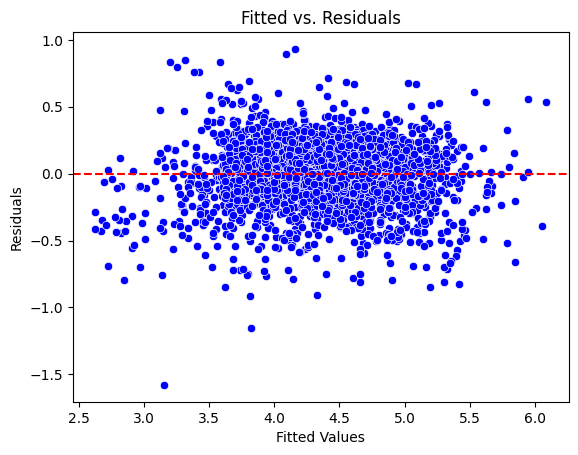

In [ ]:
#plotting fitted vs. residuals values

sns.scatterplot(data=df_ind,x='fitted', y='residual', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals')
plt.show()

###Observation:
- No pattern in the plot
- Therefore, the Model is LINEAR and residual are INDEPENDENT

##Test for Normality:
- Checking residuals' distribution: Q-Q plot, Shapiro-Wilk test
- If Residual have a normal distribution. A straight line plot will be drawn. If not, distribution is NOT normal.
- If P-value of the Shapiro-Wilk > 0.05. This will be a Normal distribution

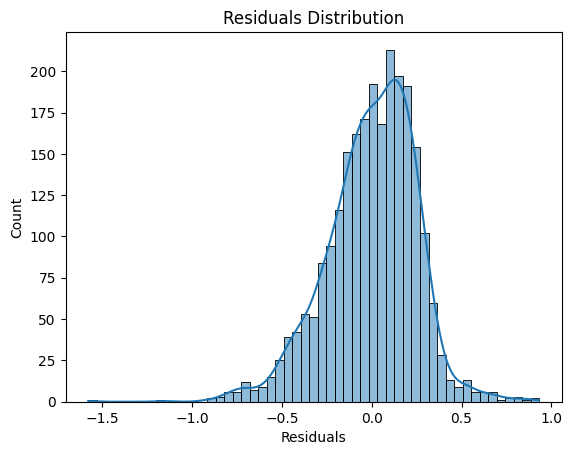

In [ ]:
sns.histplot(data=df_ind, x='residual', kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

###Observation:
- Histogram has a left skewed bell shape.
-This is a sign of normal distribution


##Q-Q Plot:

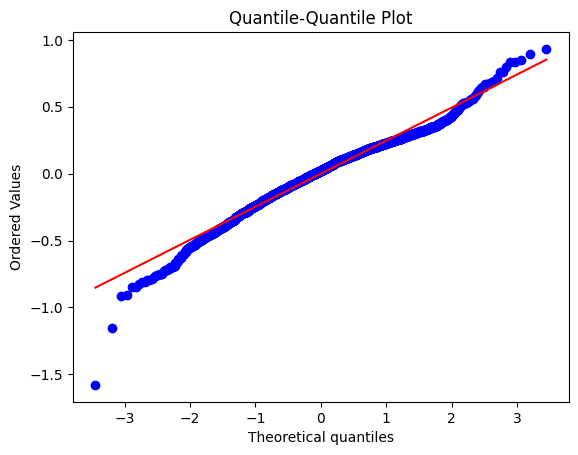

In [ ]:
stats.probplot(df_ind['residual'], plot=plt)
plt.title('Quantile-Quantile Plot')
plt.show()

##Shapiro-Wilk Test:


In [ ]:
P_value = stats.shapiro(df_ind['residual'])[1]
print('P-value = ', P_value)

P-value =  2.0830709454139666e-18


##Observation:
- P-value is way below the threshold of 0.05 >> Residuals are NOT normal accordingly to Shapiro-Wilk test
- On the contrary, Q-Q plot is showing a good approximation of a Normal distribution
- Therefore, distribution is confirmed Normal per initial assumption

###Test for Homosdasticity:
- Utilizing goldfeldqandt test
- If P-Value > 0.05, residual are Homoscedastic
- If not, residual are Heteroscedastic

In [ ]:
#begin test for Homodasticity
name = ['F-statistic', 'P-value']
test = sms.het_goldfeldquandt(df_ind['residual'], X_train_pvalue)
list(zip(name, test))

[('F-statistic', 1.0005049517053912), ('P-value', 0.4965187310899025)]

###Observation:
- Since P-Value > 0.05 | Residual are Homoscedastic
- Therefore, initial assumption is satisfied

## Final Model

In [ ]:
#Final model
model_final = sm.OLS(y_train, X_train_pvalue).fit()
print(model_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.817
Model:                               OLS   Adj. R-squared:                  0.816
Method:                    Least Squares   F-statistic:                     765.9
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           01:31:01   Log-Likelihood:                -76.051
No. Observations:                   2417   AIC:                             182.1
Df Residuals:                       2402   BIC:                             269.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

###Inferences from model:
- A unit increase in rear camera megapixel (`main_camera_mp`) >> Used/refurbish device INCREASE by 0.0147 euro
- A unit increase in front camera megapixel (`selfie_camera_mp`) >> Used/refurbish device INCREASE by 0.0117 euros
- A unit increase in the amount of RAM (`RAM`) >> Used/refurbish device INCREASE by 0.0187 euros
- A unit incrase in battery capacity (`battery`) >> Used/refurbish device INCREASE by 9.434e-05 euros
- A unit increase in Normalized price of new model of the same device (`normalized_new_price`) >> Used/refurbish device INCREASE by 0.4756 euos
- A unit increase in models' years on the market (`year_from_release`) >> Used/refurbish device DECREASE by 0.0215 euros

## Actionable Insights and Recommendations

1. Key Drivers of Used Device Prices:
    - Camera Resolution (Both Main and Selfie): Higher resolution cameras significantly increase the value of used devices.
    - RAM: More RAM translates to smoother performance and a higher resale value.
    - Battery Capacity: Longer battery life is a desirable feature, positively impacting prices.
    - Newness: Newer models command higher prices, reflecting their updated technology and features.
    - Age: Older devices depreciate in value, especially those no longer receiving software updates.

2. Inventory Strategy:
    - Prioritize Devices with Desirable Features: Stock devices with high-resolution cameras, ample RAM (ideally > 4GB), and large batteries to maximize resale value.
    - Minimize Older Models: Avoid stocking older devices, as they are less desirable and depreciate faster.

3. Pricing Strategy:
    - Dynamic Pricing: Implement a dynamic pricing strategy that adjusts prices based on device features, age, and market demand.
    - Highlight Key Features: Emphasize the desirable features of each device in product descriptions to justify higher prices.

4. Marketing Strategy:
   - Target Tech-Savvy Consumers: Focus marketing efforts on consumers who value performance and features, as they are more likely to pay a premium for devices with better cameras, RAM, and battery life.
   - Promote Device Condition: Clearly communicate the condition of used devices to build trust and transparency.

5. Additional Considerations:
    - Brand Reputation: Consider the brand reputation of devices, as popular brands may command higher prices.
    - Market Trends: Stay informed about market trends and consumer preferences to adapt inventory and pricing strategies accordingly.
